**WQD7001 GROUP12**

Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.patches as mpatches

#**OBTAIN**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving telco_data.csv to telco_data.csv


In [ ]:
telco_df = pd.read_csv('telco_data.csv')
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print(f'Dataset contains {telco_df.shape[0]} rows and {telco_df.shape[1]} columns \n')
telco_df.info()
telco_df.describe(include='all').T

Dataset contains 7043 rows and 21 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#**SCRUB**

'TotalCharges' is listed as 'object', Convert it to 'float' to maintain consistency similar to 'MonthlyCharges'

In [ ]:
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors='coerce')

In [ ]:
#Check NULL values
print(f'Dataset contains {telco_df.shape[0]} rows and {telco_df.shape[1]} columns \n')
print(telco_df.isnull().sum())
print('\n')

Dataset contains 7043 rows and 21 columns 

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64




In [ ]:
#Check Duplicate Rows
print(telco_df.dtypes)
print('\n')
print(f'Duplicate rows: {telco_df.duplicated().sum()}')

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


Duplicate rows: 0


In [ ]:
#Check for typos / inconsistent category
for col in telco_df.select_dtypes('object'):
    print(col, telco_df[col].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


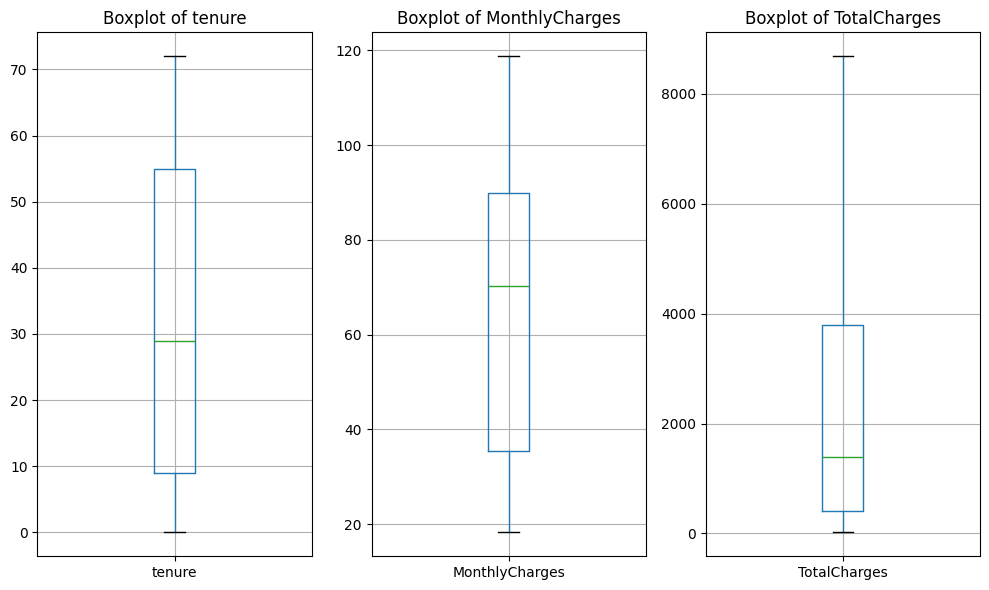

In [ ]:
#Check Outlier
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(10, 6))

for i, col in enumerate(cols):
    plt.subplot(1, len(cols), i + 1)  # 1 row, 2 columns
    telco_df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

For the purpose of Correlation Analysis & Modelling, we will encode the categorical variables.

- Binary Encoding for Binary Variables
- Ordinal Encoding for Ordinal Variables
- One-Hot Encoding for Nominal Variables

In [ ]:
telco_df.drop(labels=telco_df[telco_df['tenure'] == 0].index, axis=0, inplace=True)
telco_df[telco_df['tenure'] == 0].index

Index([], dtype='int64')

In [ ]:
telco_df.fillna(telco_df["TotalCharges"].mean())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
# Define columns
binary_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
ordinal_col = ['Contract']
nominal_cols = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaymentMethod']

# Copy telco_df
encoded_df = telco_df.copy()

# Step 1: Encode binary variables
yes_no_map = {'Yes': 1, 'No': 0}
gender_map = {'Female': 0, 'Male': 1}

encoded_df['gender'] = encoded_df['gender'].map(gender_map)
encoded_df['Partner'] = encoded_df['Partner'].map(yes_no_map)
encoded_df['Dependents'] = encoded_df['Dependents'].map(yes_no_map)
encoded_df['PhoneService'] = encoded_df['PhoneService'].map(yes_no_map)
encoded_df['PaperlessBilling'] = encoded_df['PaperlessBilling'].map(yes_no_map)
encoded_df['Churn'] = encoded_df['Churn'].map(yes_no_map)
for col in binary_cols:
    encoded_df[col] = encoded_df[col].astype(int)

# Step 2: Ordinal encode 'Contract'
ord_encoder = OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']])
encoded_df['Contract'] = ord_encoder.fit_transform(encoded_df[['Contract']])

# Step 3: One-hot encode nominal variables
encoded_df = pd.get_dummies(encoded_df, columns=nominal_cols, drop_first=True)

# Drop unique customer ID
encoded_df.drop('customerID', axis=1, inplace=True)

#**EXPLORE**

## Categorical Variable

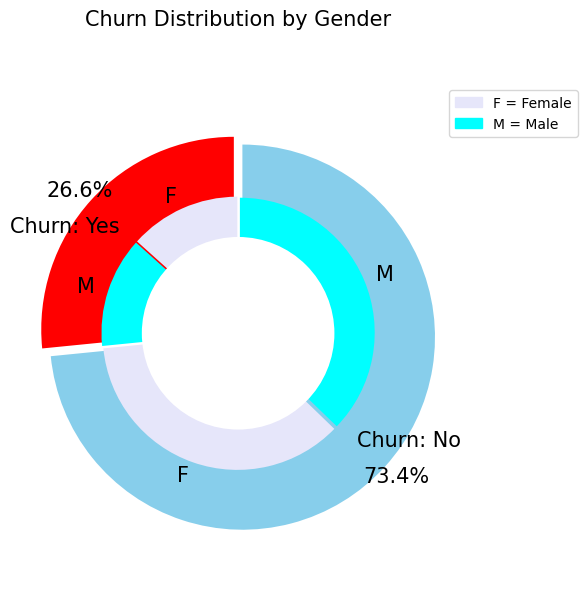

In [ ]:
plt.figure(figsize=(6, 6))

# Outer ring (Churn status)
churn_counts = telco_df['Churn'].value_counts()
labels = ["Churn: Yes", "Churn: No"]
values = [churn_counts['Yes'], churn_counts['No']]
colors = ['red', 'skyblue']  # red for churned, skyblue for not churned
explode = (0.3, 0.3)

# Inner ring (Gender distribution within churn status)
labels_gender = ["F", "M", "F", "M"]
gender_churn_counts = telco_df.groupby(['Churn', 'gender']).size().unstack()
sizes_gender = [gender_churn_counts.loc['Yes', 'Female'], gender_churn_counts.loc['Yes', 'Male'], gender_churn_counts.loc['No', 'Female'], gender_churn_counts.loc['No', 'Male']]
colors_gender = ['lavender', 'aqua', 'lavender', 'aqua']  # lavender = female, aqua = male
explode_gender = (0.1, 0.1, 0.1, 0.1)
textprops = {"fontsize": 15}

# Plot outer ring: Churn status
plt.pie(
    values, labels=labels, autopct='%1.1f%%',
    pctdistance=1.08, labeldistance=0.8,
    colors=colors, startangle=90, frame=True,
    explode=explode, radius=10, textprops=textprops,
    counterclock=True
)

# Plot inner ring: Gender distribution
plt.pie(
    sizes_gender, labels=labels_gender,
    colors=colors_gender, startangle=90,
    explode=explode_gender, radius=7,
    textprops=textprops, counterclock=True
)

# Center circle to create donut chart appearance
centre_circle = plt.Circle((0, 0), 5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Legend for gender
female_patch = mpatches.Patch(color='lavender', label='F = Female')
male_patch = mpatches.Patch(color='aqua', label='M = Male')
plt.legend(handles=[female_patch, male_patch], loc='upper right', bbox_to_anchor=(1.3, 1))

# Title and layout
plt.title('Churn Distribution by Gender', fontsize=15, y=1.1)
plt.axis('equal')  # Ensures pie chart is a circle
plt.tight_layout()
plt.show()


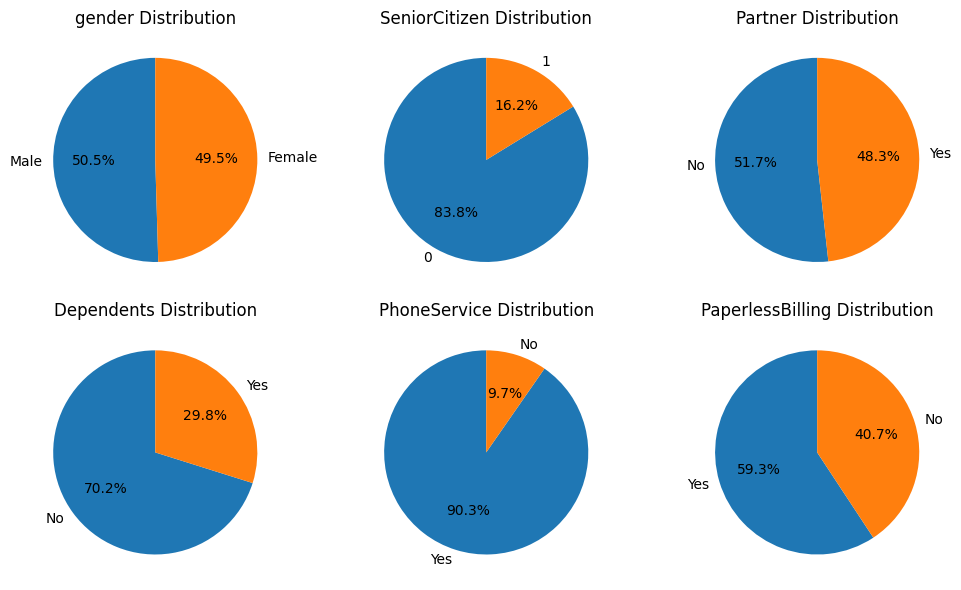

In [ ]:
# Identify binary columns (excluding 'customerID' which is not categorical)
binary_cols = [col for col in telco_df.columns
               if telco_df[col].nunique() == 2 and col not in ['customerID','Churn']]

# Setup subplot grid
num_plots = len(binary_cols)
cols = 3
rows = (num_plots + cols - 1) // cols  # Ceiling division

fig, axes = plt.subplots(rows, cols, figsize=(10, 3 * rows))
axes = axes.flatten()

# Plot pie charts for each binary column
for i, col in enumerate(binary_cols):
    counts = telco_df[col].value_counts()
    labels = [str(label) for label in counts.index]
    axes[i].pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

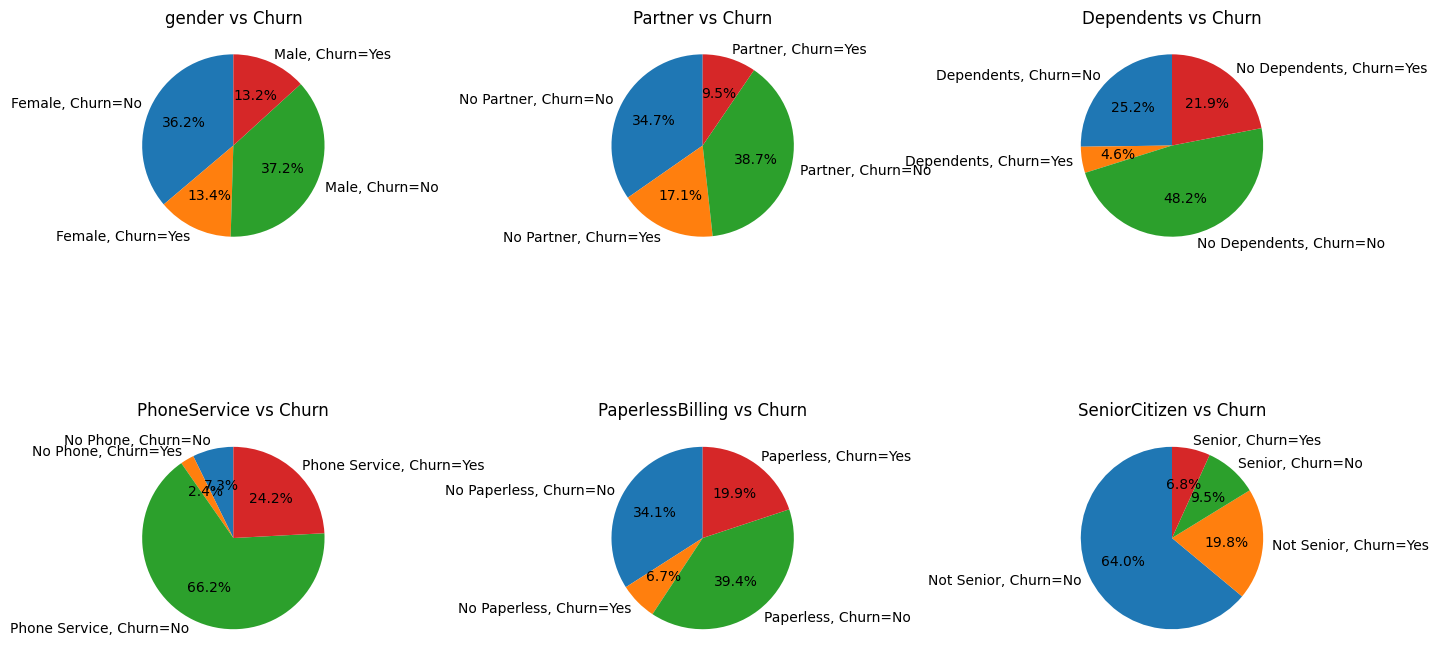

In [ ]:
# Mapping dictionaries for readability
label_maps = {
    'gender': {0: 'Female', 1: 'Male'},
    'Partner': {0: 'No Partner', 1: 'Partner'},
    'Dependents': {0: 'No Dependents', 1: 'Dependents'},
    'PhoneService': {0: 'No Phone', 1: 'Phone Service'},
    'PaperlessBilling': {0: 'No Paperless', 1: 'Paperless'},
    'SeniorCitizen': {0: 'Not Senior', 1: 'Senior'},
}

# Use 'encoded_df' which has binary values (0/1), but for piechart use mapped labels
binary_cols = list(label_maps.keys())  # make sure these exist in your encoded_df

cols = 3
rows = (len(binary_cols) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(binary_cols):
    temp_df = encoded_df[[col, 'Churn']].copy()

    # Map binary values to readable strings
    temp_df['Label'] = temp_df[col].map(label_maps[col]) + ', Churn=' + temp_df['Churn'].map({0: 'No', 1: 'Yes'})

    # Count combinations
    counts = temp_df['Label'].value_counts().sort_index()

    # Pie chart
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{col} vs Churn')

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

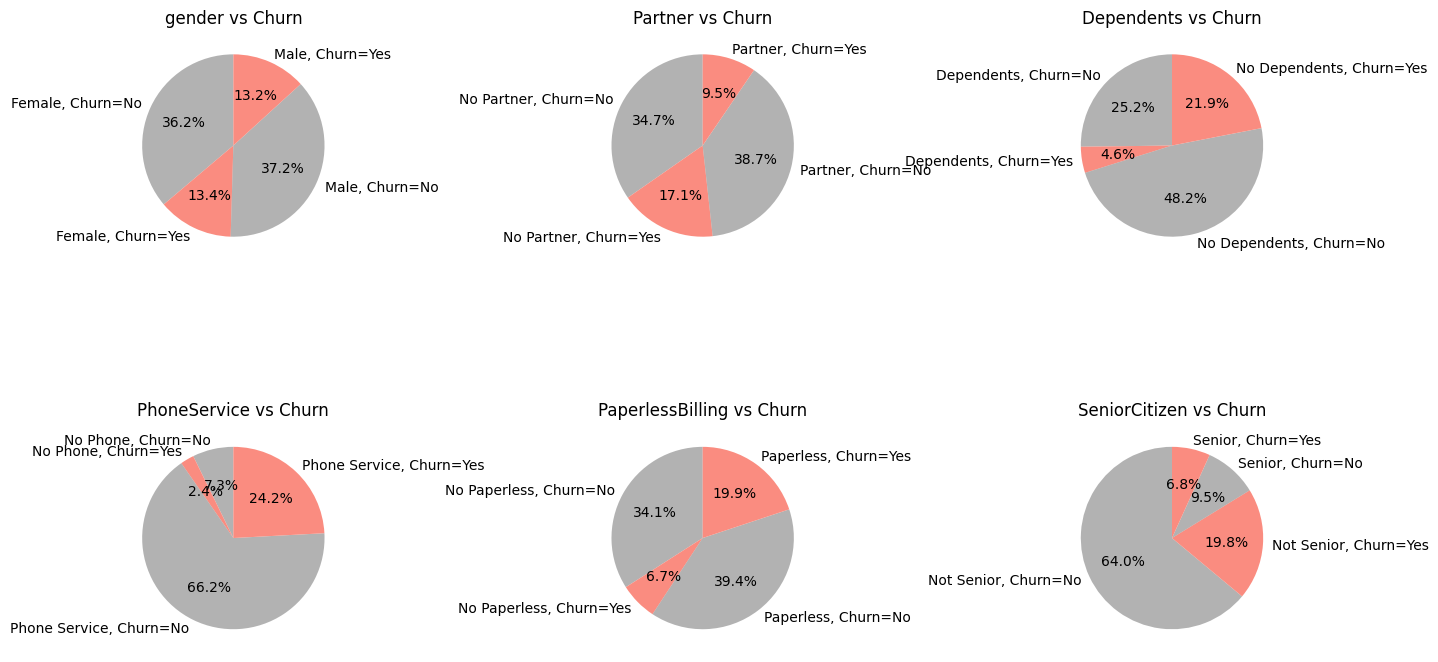

In [ ]:
from matplotlib.colors import to_rgba

# Color palette: red for churn=yes, gray for churn=no
bright_color = to_rgba('salmon', alpha=0.9)
dim_color = to_rgba('gray', alpha=0.6)

# Function to assign color based on churn status in the label
def get_color(label):
    return bright_color if 'Churn=Yes' in label else dim_color

fig, axes = plt.subplots(rows, cols, figsize=(14, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(binary_cols):
    temp_df = encoded_df[[col, 'Churn']].copy()
    temp_df['Label'] = temp_df[col].map(label_maps[col]) + ', Churn=' + temp_df['Churn'].map({0: 'No', 1: 'Yes'})
    counts = temp_df['Label'].value_counts().sort_index()

    # Generate color list
    colors = [get_color(label) for label in counts.index]

    axes[i].pie(counts, labels=counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{col} vs Churn')

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Identify binary columns (excluding 'customerID' and 'Churn')
binary_cols = [col for col in telco_df.columns
               if telco_df[col].nunique() == 2 and col not in ['customerID', 'Churn']]

# Layout size
cols = 3
rows = -(-len(binary_cols) // cols)  # Ceiling division

# Subplot grid
fig = make_subplots(
    rows=rows,
    cols=cols,
    specs=[[{'type': 'domain'} for _ in range(cols)] for _ in range(rows)],
    subplot_titles=[f'{col} vs Churn' for col in binary_cols]
)

# Add each donut to a subplot
for i, col in enumerate(binary_cols):
    row = i // cols + 1
    col_pos = i % cols + 1

    grouped_data = telco_df.groupby([col, 'Churn']).size().reset_index()
    grouped_data.rename(columns={0: 'count'}, inplace=True)
    grouped_data['label'] = (col + ': ' + grouped_data[col].astype(str) +
                             ' | Churn: ' + grouped_data['Churn'].astype(str))

    fig.add_trace(go.Pie(
        labels=grouped_data['label'],
        values=grouped_data['count'],
        hole=0.4,
        textinfo='percent',
        hovertemplate='<b>%{label}</b><br>Count: %{value}<extra></extra>',
        name=col,
        legendgroup=col,
        showlegend=True
    ), row=row, col=col_pos)

fig.update_layout(
    height=300 * rows,
    width=1000,
    title_text="Churn Distribution Across Variables",
    title_x=0.5,
    margin=dict(b=150),
    legend=dict(
        orientation='h',
        yanchor='top',
        y=-0.2
    )
)


fig.show()

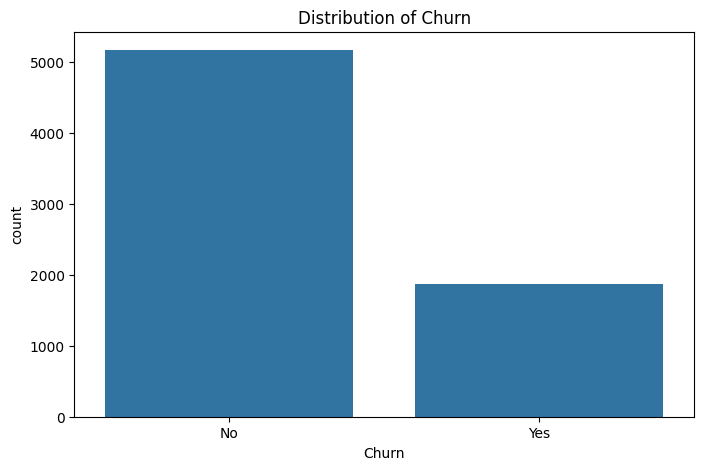

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=telco_df, x='Churn')
plt.title('Distribution of Churn')
plt.show()

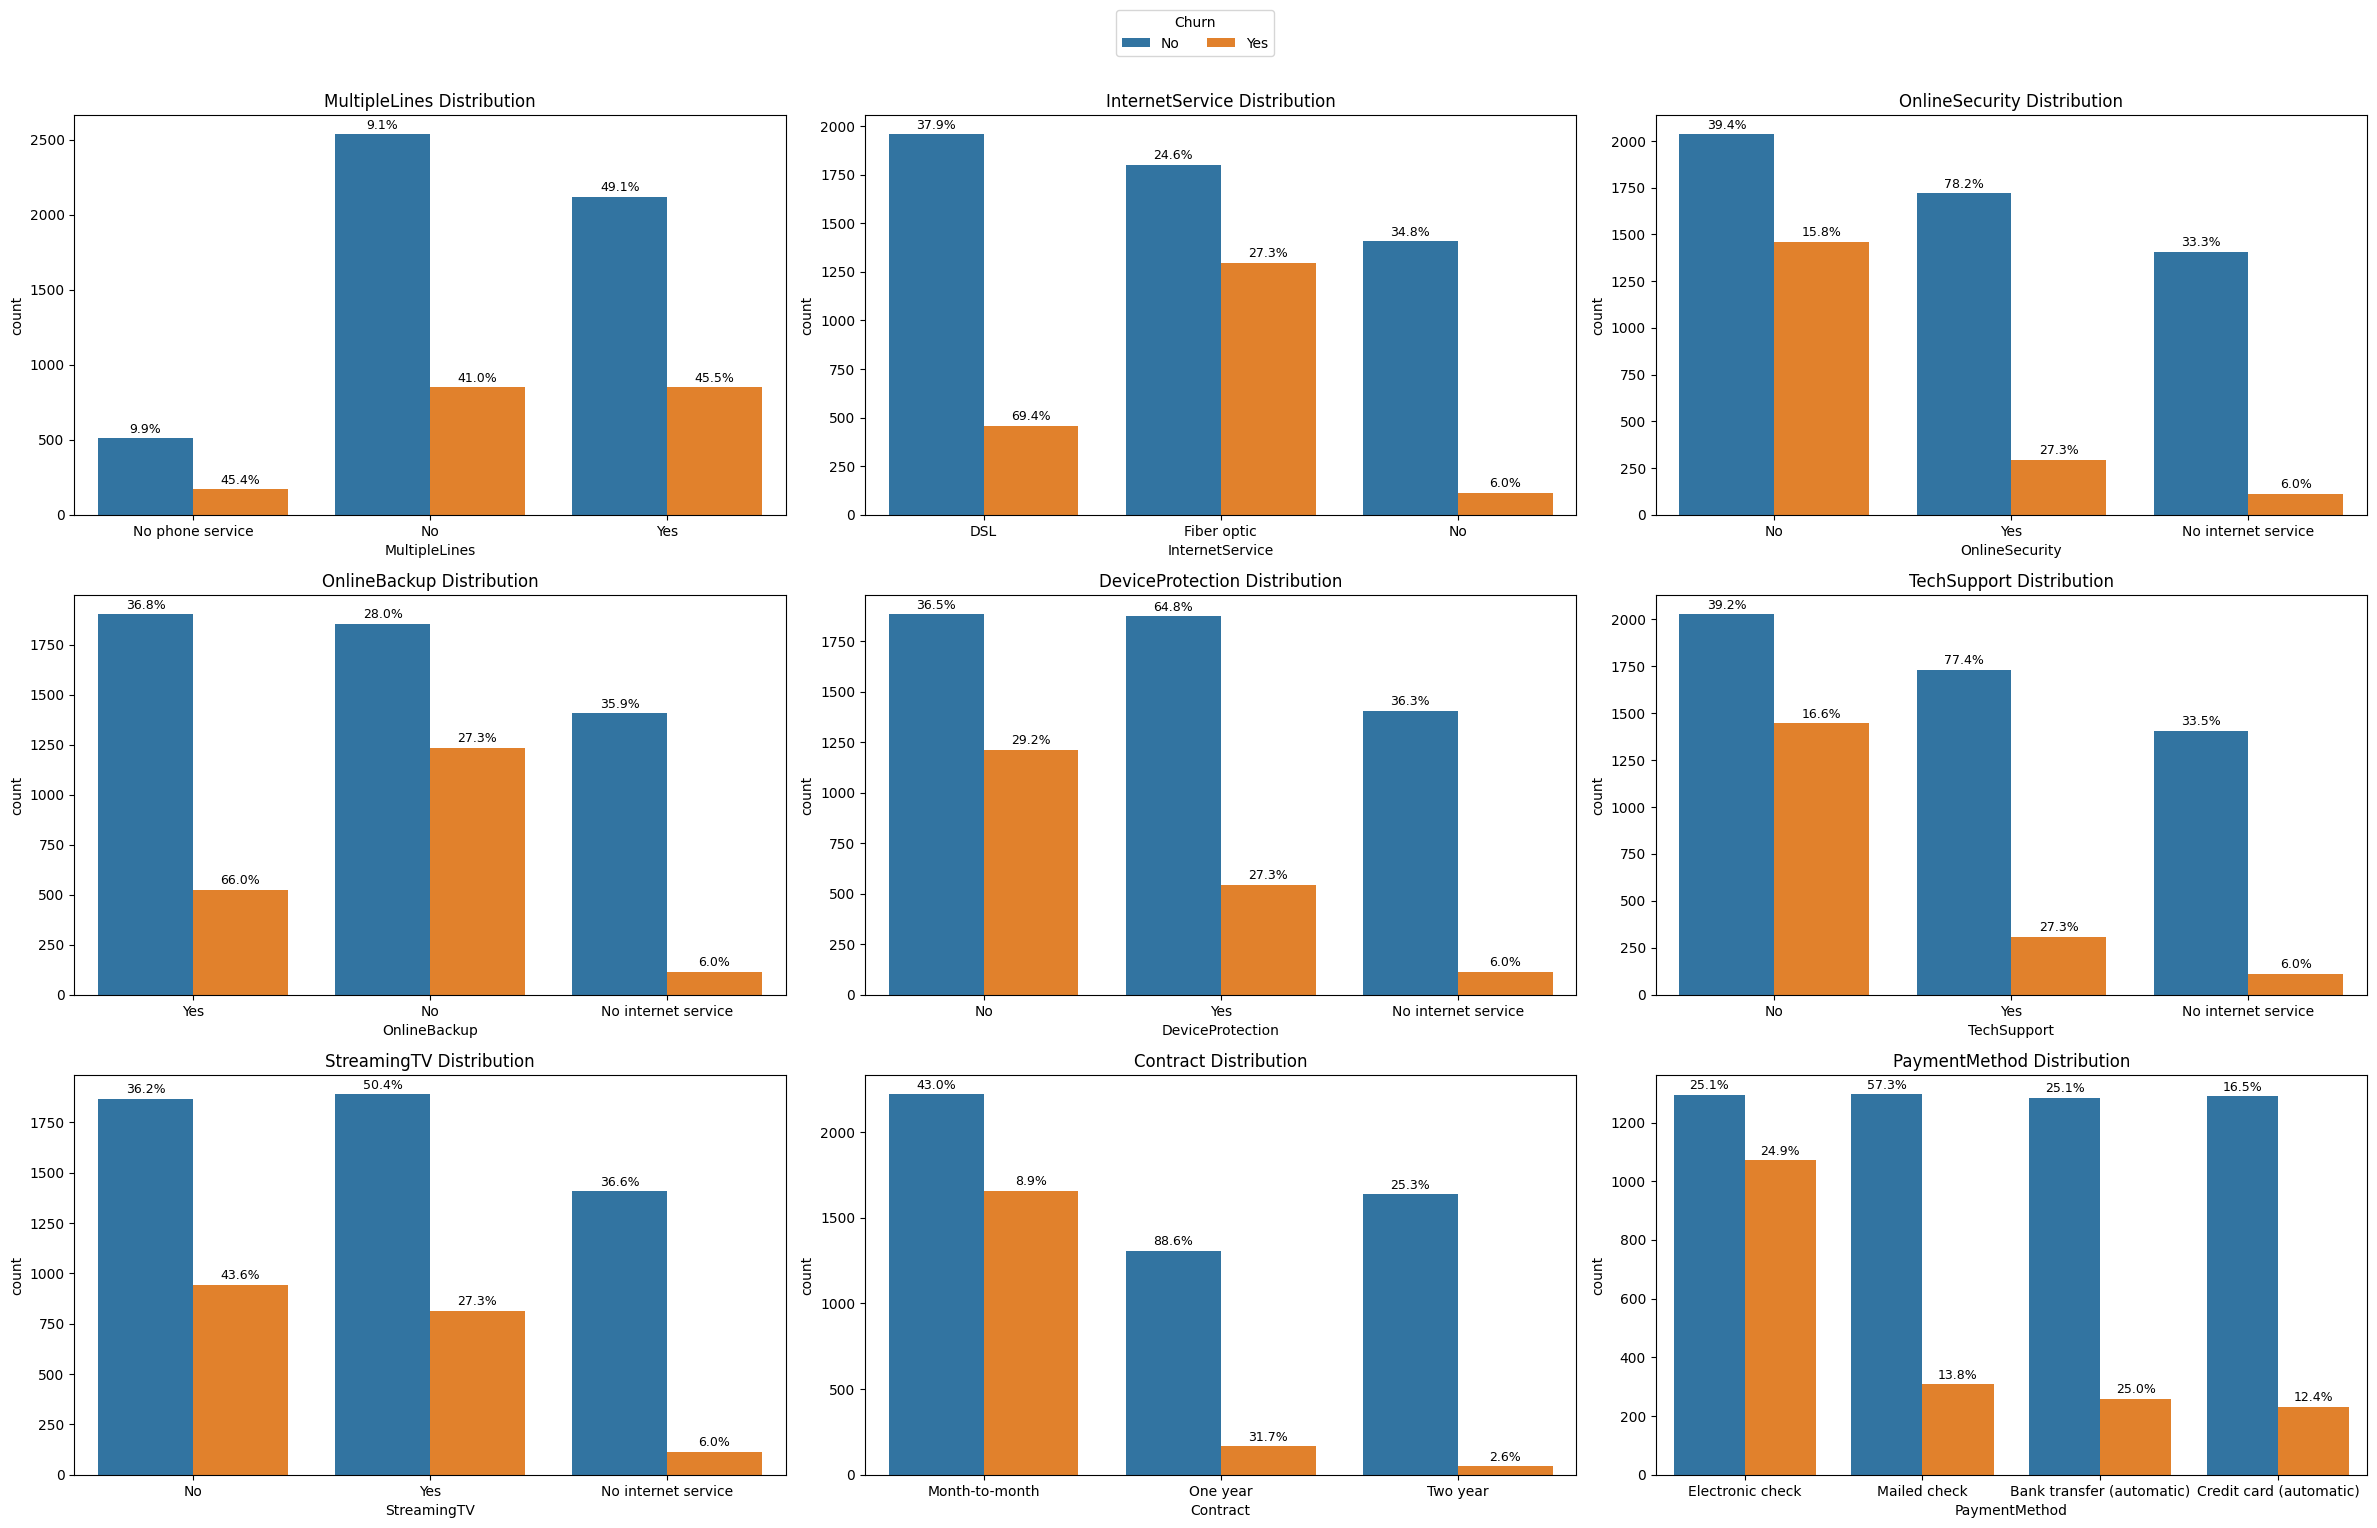

In [ ]:
# List of categorical columns to plot
categorical_cols = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','Contract','PaymentMethod']

# Subplot grid setup
num_plots = len(categorical_cols)
cols = 3
rows = (num_plots + cols - 1) // cols  # Ceiling division

fig, axes = plt.subplots(rows, cols, figsize=(24, 5 * rows))
axes = axes.flatten()

# For shared legend
handles, labels = None, None

# Loop through each column and create plots
for i, col in enumerate(categorical_cols):
    ax = axes[i]

    # Create countplot
    sns.countplot(data=telco_df, x=col, hue='Churn', ax=ax)
    ax.set_title(f'{col} Distribution')

    if handles is None or labels is None:
        handles, labels = ax.get_legend_handles_labels()
    if ax.get_legend():
        ax.legend_.remove()

    # Get counts per Churn group
    churn_groups = telco_df.groupby('Churn')

    # Bar counter
    patch_index = 0

    # Loop over x categories
    for cat in telco_df[col].dropna().unique():
        for churn_val in sorted(telco_df['Churn'].unique()):
            count = churn_groups.get_group(churn_val)
            cat_count = count[count[col] == cat].shape[0]
            total_churn = churn_groups.get_group(churn_val).shape[0]
            percent = 100 * cat_count / total_churn if total_churn else 0

            # Annotate the correct bar
            if patch_index < len(ax.patches):
                p = ax.patches[patch_index]
                height = p.get_height()
                if height > 0:
                    ax.annotate(f'{percent:.1f}%',
                                (p.get_x() + p.get_width() / 2, height),
                                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 2),
                                textcoords='offset points')
            patch_index += 1

# Remove unused axes if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Shared legend
fig.legend(handles, labels, title='Churn', loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=2)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## Continuous Variables

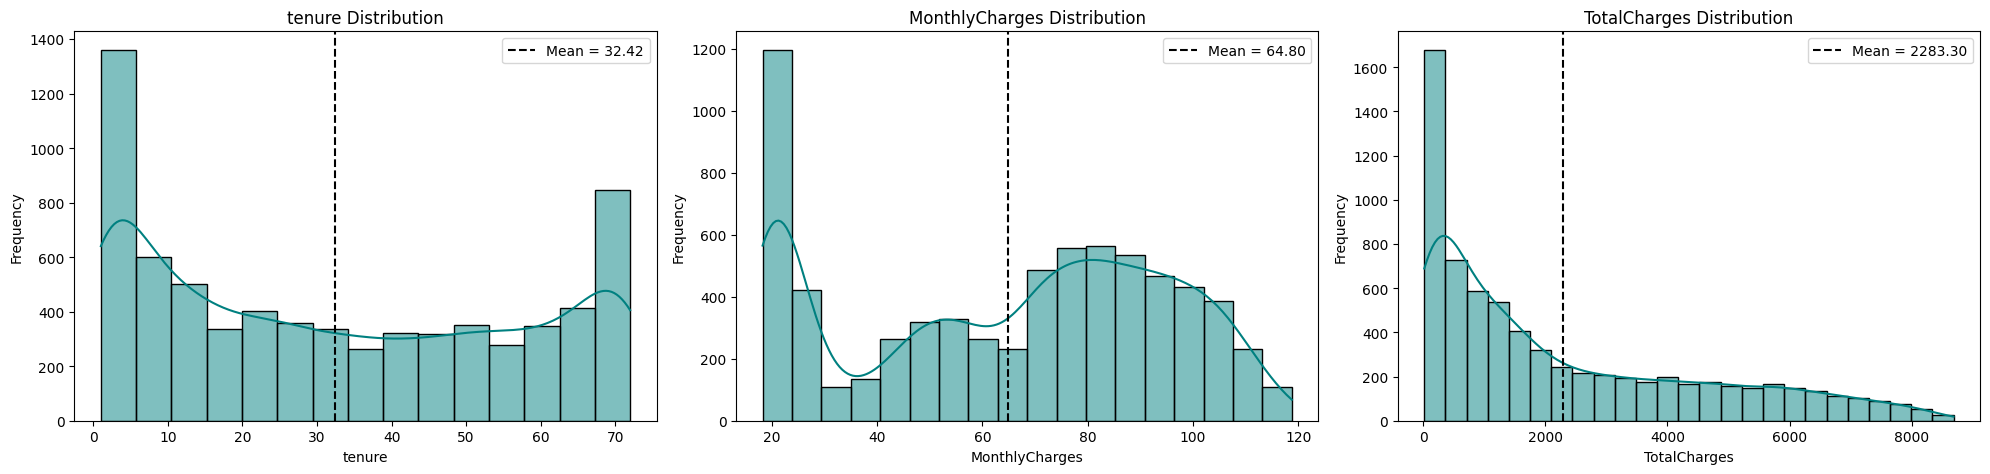

In [ ]:
# List of continuous variables to plot
continuous_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Subplot grid setup
num_plots = len(continuous_cols)
cols = 3
rows = 1

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Loop through each column and create plots
for i, col in enumerate(continuous_cols):
    ax = axes[i]

    # Create histogram for individual column
    sns.histplot(telco_df[col], kde=True, color='teal', ax=ax)

    # Plot vertical mean line
    mean_val = telco_df[col].mean()
    ax.axvline(mean_val, color='black', linestyle='--', linewidth=1.5, label=f'Mean = {mean_val:.2f}')

    # Add titles and labels
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

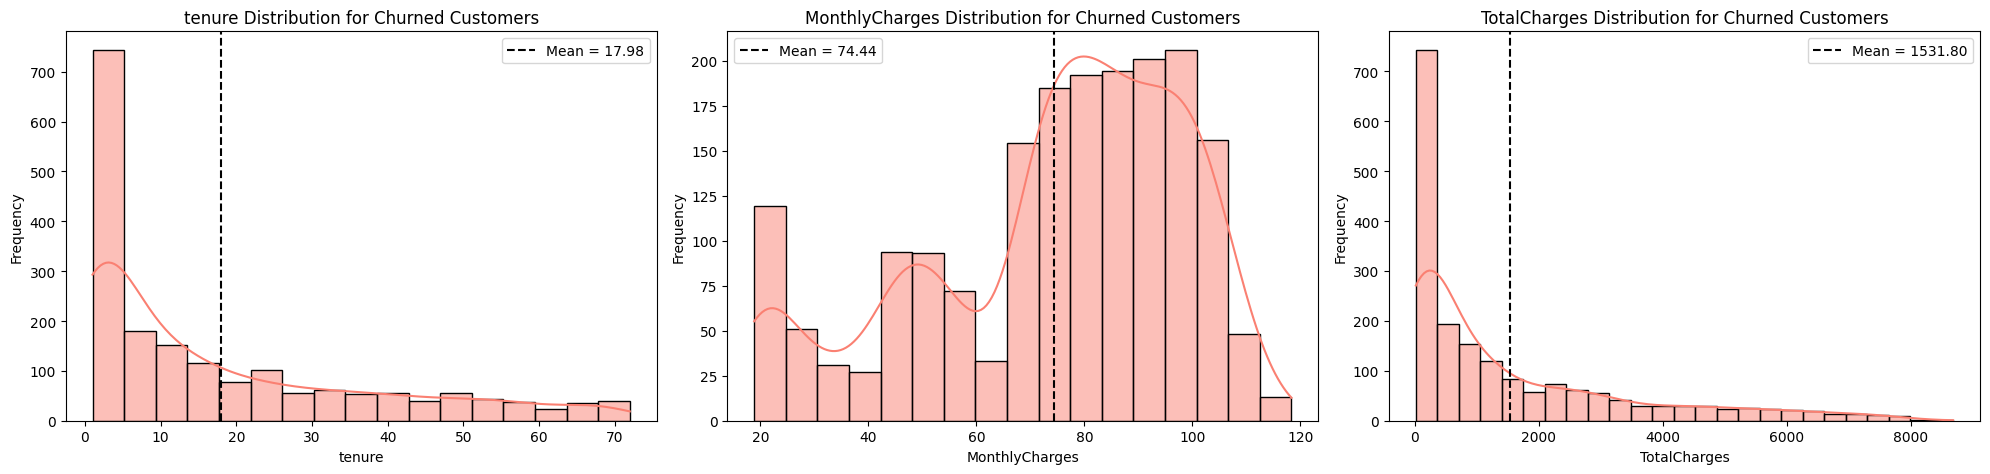

In [ ]:
# Filter DataFrame for churned customers only
churned_df = telco_df[telco_df['Churn'] == 'Yes']

# List of continuous variables to plot
continuous_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Subplot grid setup
num_plots = len(continuous_cols)
cols = 3
rows = 1

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Loop through each column and create plots
for i, col in enumerate(continuous_cols):
    ax = axes[i]

    # Create histogram for churned customers
    sns.histplot(churned_df[col], kde=True, color='salmon', ax=ax)

    # Calculate and plot mean
    mean_val = churned_df[col].mean()
    ax.axvline(mean_val, color='black', linestyle='--', linewidth=1.5, label=f'Mean = {mean_val:.2f}')

    # Titles and labels
    ax.set_title(f'{col} Distribution for Churned Customers')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

'monthly charges of churned customers' shows a gaussian/normal distribution, might need to do some something and clarify the mean and skewness in the histogram

## Correlation Heatmaps

In [ ]:
print(encoded_df.dtypes)
print('\n')
print(f'Duplicate rows: {encoded_df.duplicated().sum()}')

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
Contract                                 float64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes

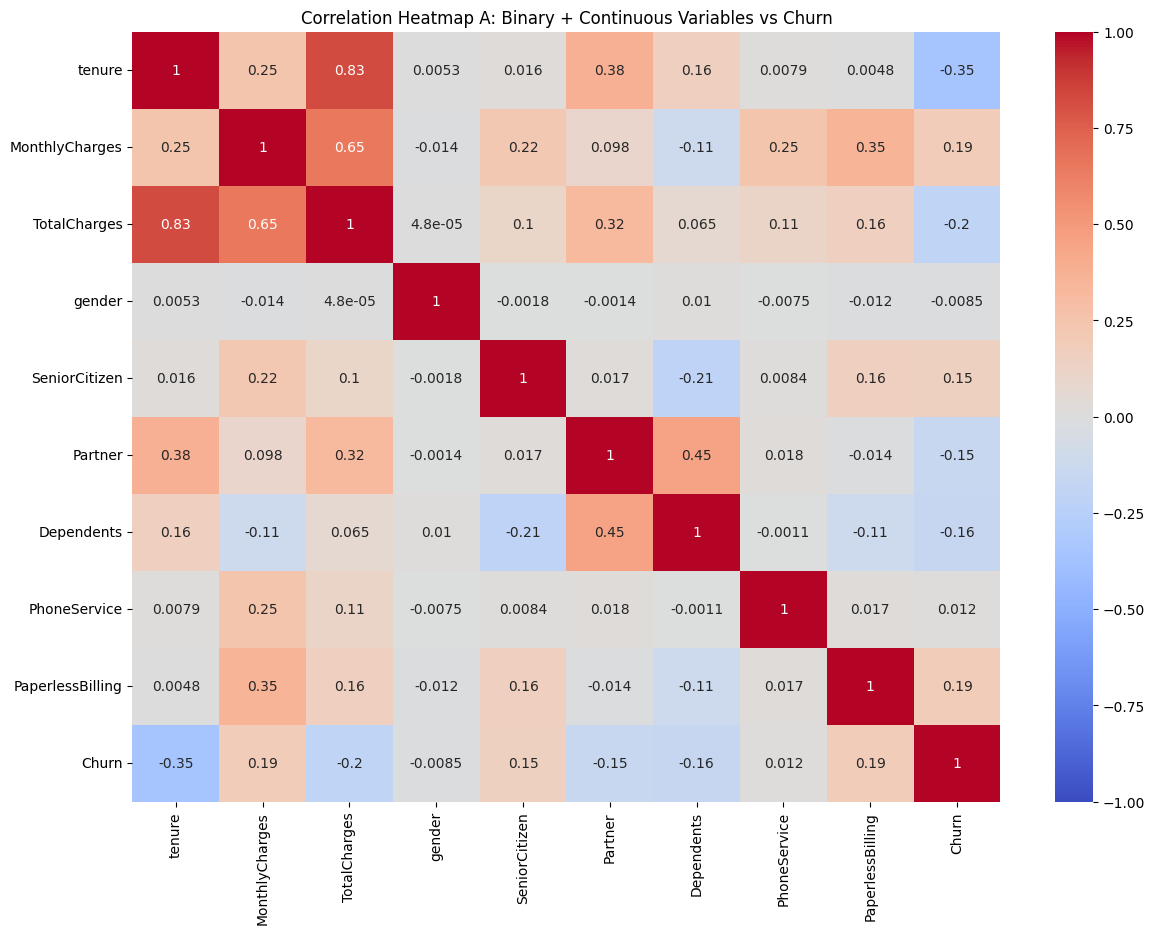

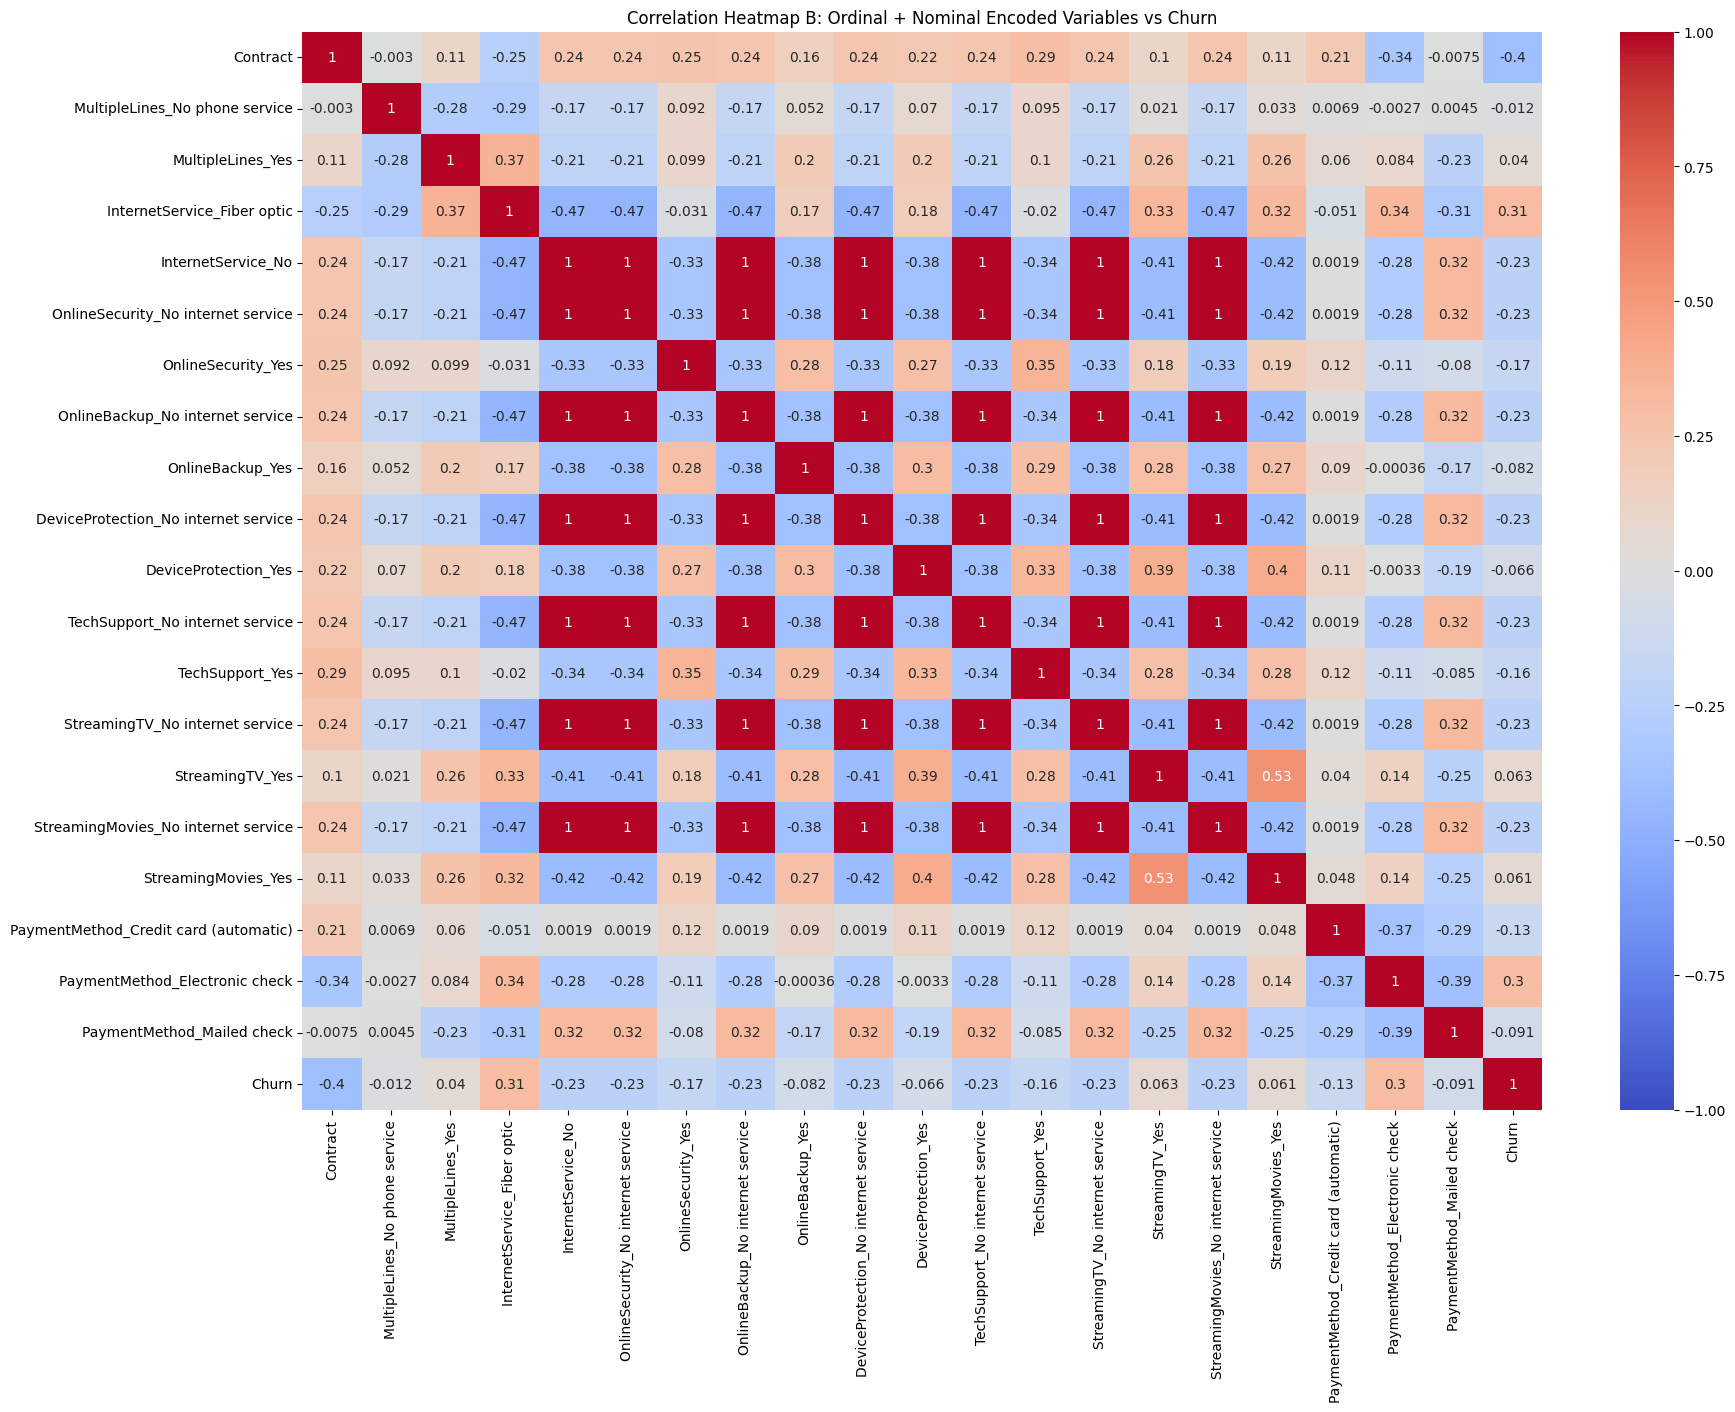

In [ ]:
binary_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
ordinal_col = ['Contract']
nominal_dummy_cols = [
    'MultipleLines_No phone service', 'MultipleLines_Yes',
    'InternetService_Fiber optic', 'InternetService_No',
    'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
    'OnlineBackup_No internet service', 'OnlineBackup_Yes',
    'DeviceProtection_No internet service', 'DeviceProtection_Yes',
    'TechSupport_No internet service', 'TechSupport_Yes',
    'StreamingTV_No internet service', 'StreamingTV_Yes',
    'StreamingMovies_No internet service', 'StreamingMovies_Yes',
    'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check']
continuous_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Heatmap A: Binary + Continuous + Churn
heatmap_a_cols = continuous_cols + binary_cols
heatmap_a_df = encoded_df[heatmap_a_cols]

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_a_df.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)
plt.title('Correlation Heatmap A: Binary + Continuous Variables vs Churn')
plt.show()

# Correlation heatmap B: Ordinal & Nominal Variables against Churn
heatmap_b_cols = ordinal_col + nominal_dummy_cols + ['Churn']
heatmap_b_df = encoded_df[heatmap_b_cols].astype(float)  # Ensure data is numeric

# Plot Heatmap B
plt.figure(figsize=(20, 14))
sns.heatmap(heatmap_b_df.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)
plt.title('Correlation Heatmap B: Ordinal + Nominal Encoded Variables vs Churn')
plt.show()

In [ ]:
# Step 1: Encode binary variables
yes_no_map = {'Yes': 1, 'No': 0}
gender_map = {'Female': 0, 'Male': 1}

telco_df['gender'] = telco_df['gender'].map(gender_map)
telco_df['Partner'] = telco_df['Partner'].map(yes_no_map)
telco_df['Dependents'] = telco_df['Dependents'].map(yes_no_map)
telco_df['PhoneService'] = telco_df['PhoneService'].map(yes_no_map)
telco_df['PaperlessBilling'] = telco_df['PaperlessBilling'].map(yes_no_map)
telco_df['Churn'] = telco_df['Churn'].map(yes_no_map)
for col in binary_cols:
    telco_df[col] = telco_df[col].astype(int)

<ipython-input-25-1113222467>:1: FutureWarning:

The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



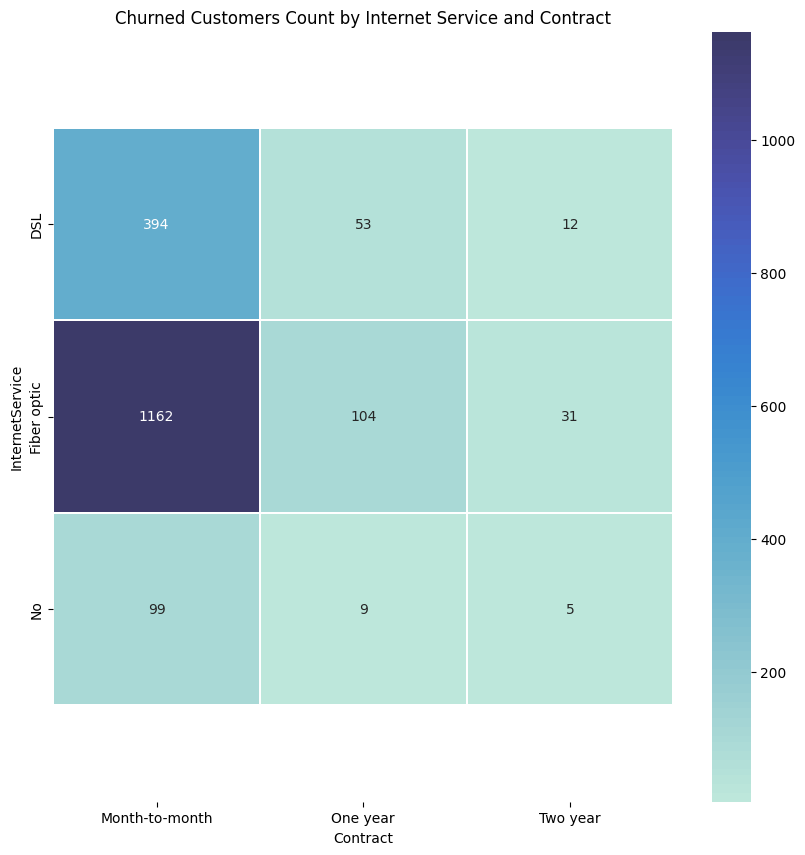

In [ ]:
pvt_tbl = pd.pivot_table(data = telco_df,
                         index = 'InternetService',
                         columns = 'Contract',
                         values = 'Churn',
                         aggfunc = sum,  fill_value = 0)

plt.figure(figsize=[10,10])
hm = sns.heatmap(data = pvt_tbl,
                 annot = True,
                 fmt='.0f',
                 linewidths=.2,
                 center = 1600)

bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Churned Customers Count by Internet Service and Contract")
plt.show()

<ipython-input-26-3215785347>:1: FutureWarning:

The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



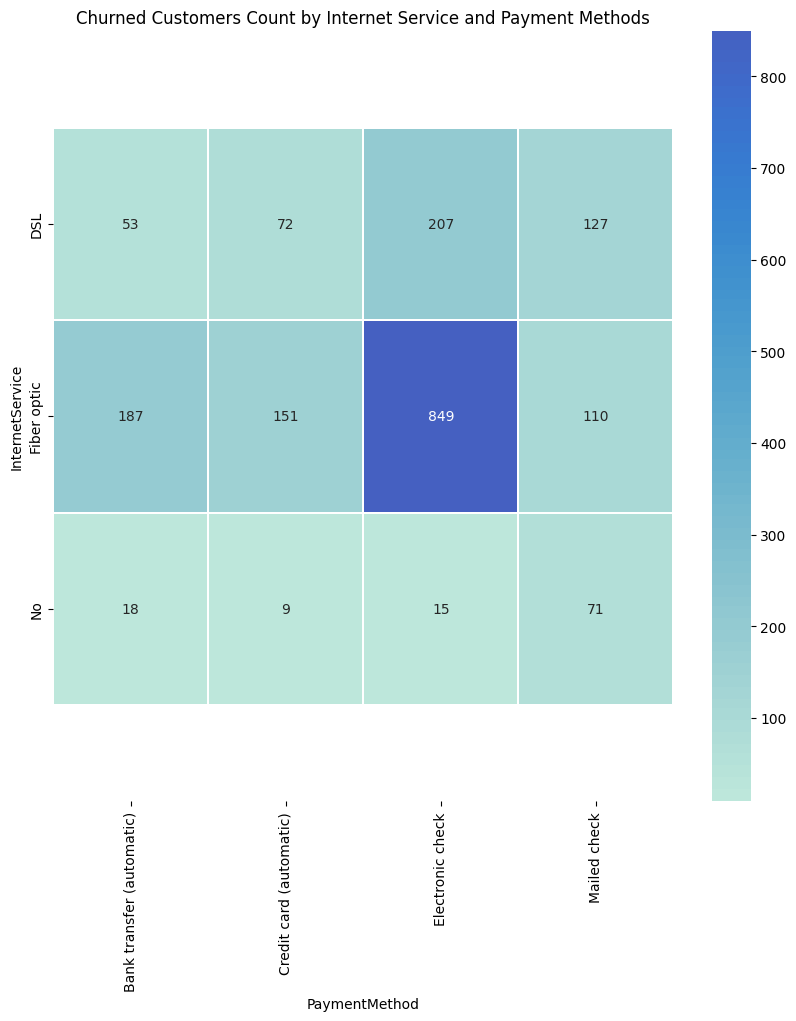

In [ ]:
pvt_tbl = pd.pivot_table(data = telco_df,
                         index = 'InternetService',
                         columns = 'PaymentMethod',
                         values = 'Churn',
                         aggfunc = sum,  fill_value = 0)

plt.figure(figsize=[10,10])
hm = sns.heatmap(data = pvt_tbl,
                 annot = True,
                 fmt='.0f',
                 linewidths=.2,
                 center = 1600)

bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Churned Customers Count by Internet Service and Payment Methods")
plt.show()

<ipython-input-27-2564719035>:1: FutureWarning:

The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



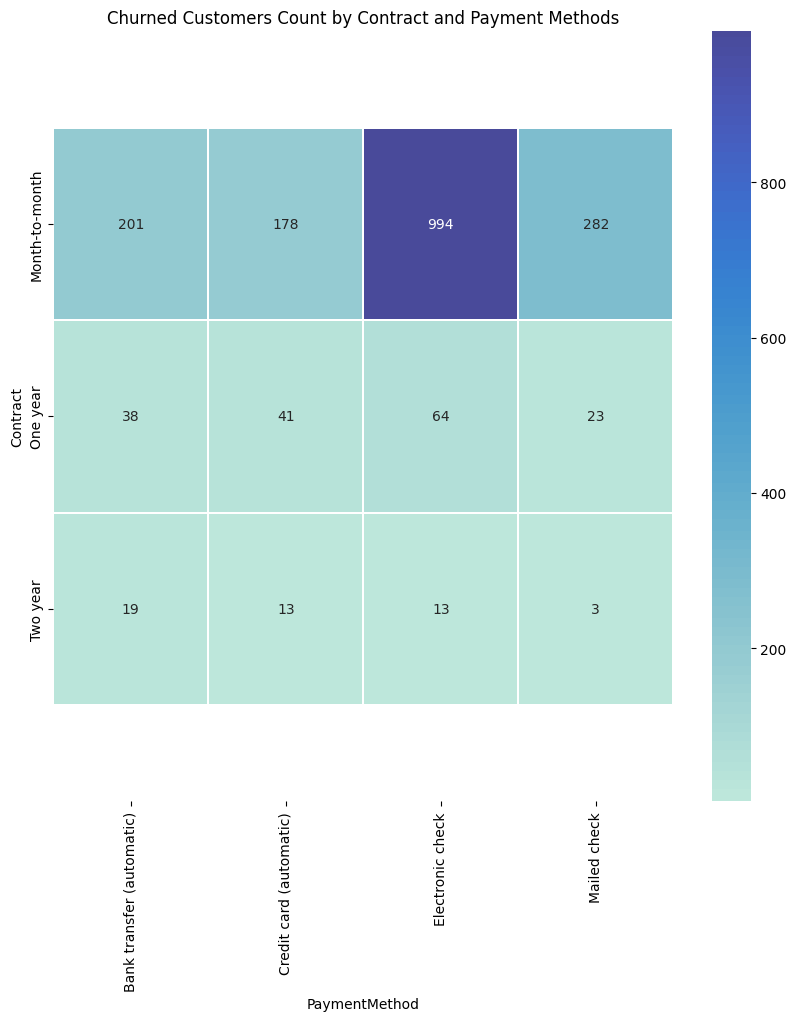

In [ ]:
pvt_tbl = pd.pivot_table(data = telco_df,
                         index = 'Contract',
                         columns = 'PaymentMethod',
                         values = 'Churn',
                         aggfunc = sum,  fill_value = 0)

plt.figure(figsize=[10,10])
hm = sns.heatmap(data = pvt_tbl,
                 annot = True,
                 fmt='.0f',
                 linewidths=.2,
                 center = 1600)

bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Churned Customers Count by Contract and Payment Methods")
plt.show()

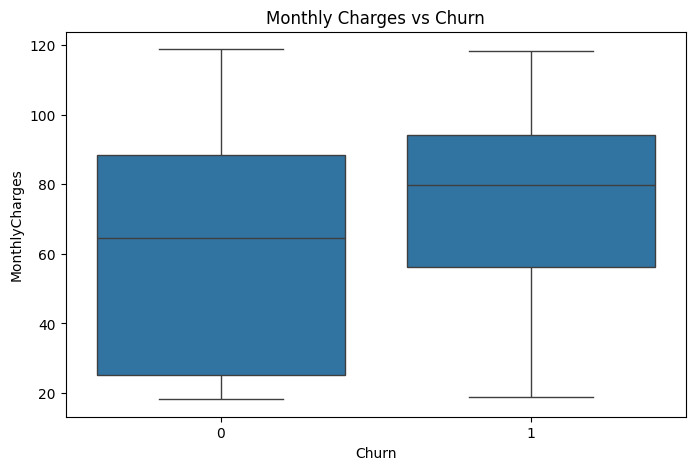

In [ ]:
#Monthly Charges by Churn Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=telco_df)
plt.title('Monthly Charges vs Churn')
plt.show()

Key Findings: Show if churned customers tend to have higher or lower charges

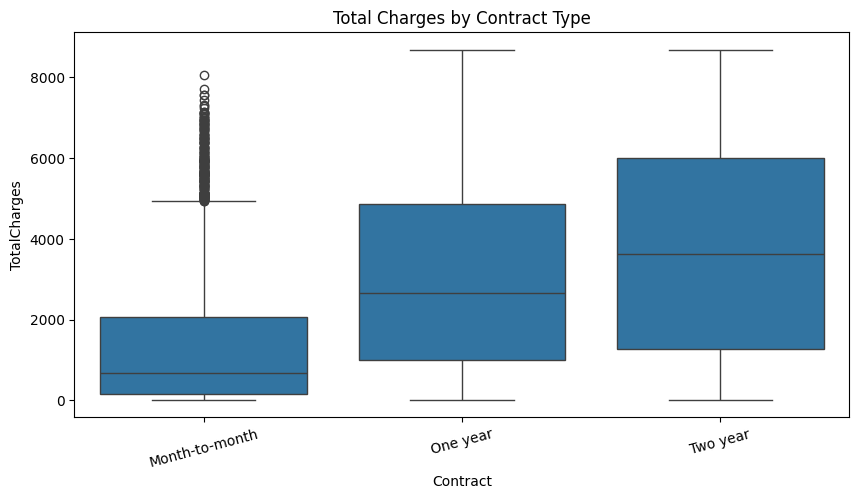

In [ ]:
#Total Charges by Contract Type Boxplot
#Convert 'TotalCharges' to numeric
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors='coerce')

#Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x='Contract', y='TotalCharges', data=telco_df)
plt.title('Total Charges by Contract Type')
plt.xticks(rotation=15)
plt.show()

Key Findings: Whether longer contracts are associated with higher total charges

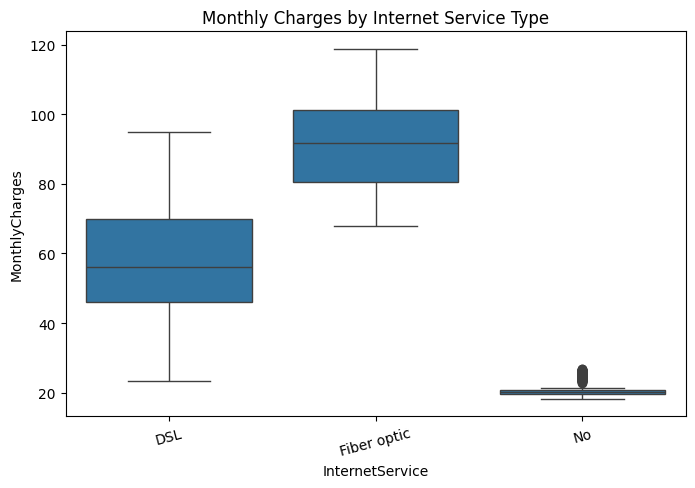

In [ ]:
#Monthly Charges by Internet Service Type Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='InternetService', y='MonthlyCharges', data=telco_df)
plt.title('Monthly Charges by Internet Service Type')
plt.xticks(rotation=15)
plt.show()

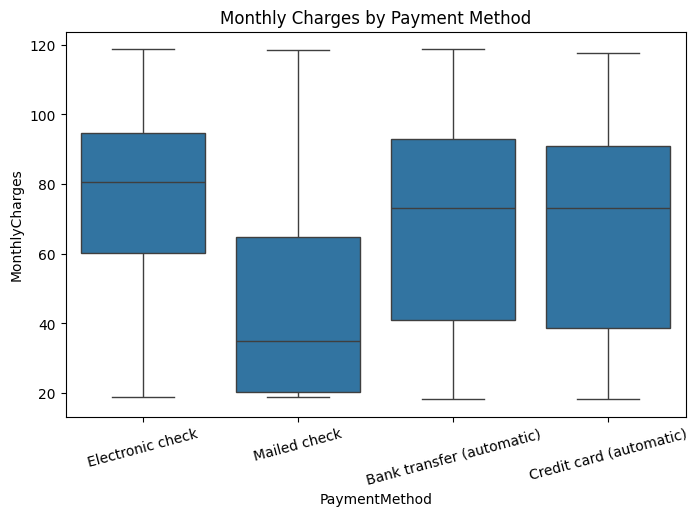

In [ ]:
#Monthly Charges by Payment Method Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='PaymentMethod', y='MonthlyCharges', data=telco_df)
plt.title('Monthly Charges by Payment Method')
plt.xticks(rotation=15)
plt.show()

Key findings: Shows how internet service types differ in cost and variability

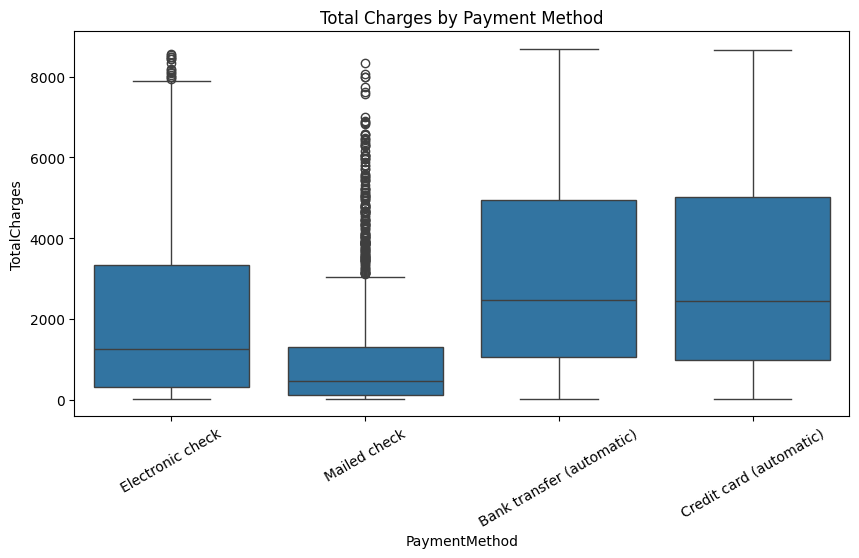

In [ ]:
#Total Charges by Payment Method Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x='PaymentMethod', y='TotalCharges', data=telco_df)
plt.title('Total Charges by Payment Method')
plt.xticks(rotation=30)
plt.show()

Key Findings: Trends based on how customers prefer to pay (Bank Transfer and Credit Card)

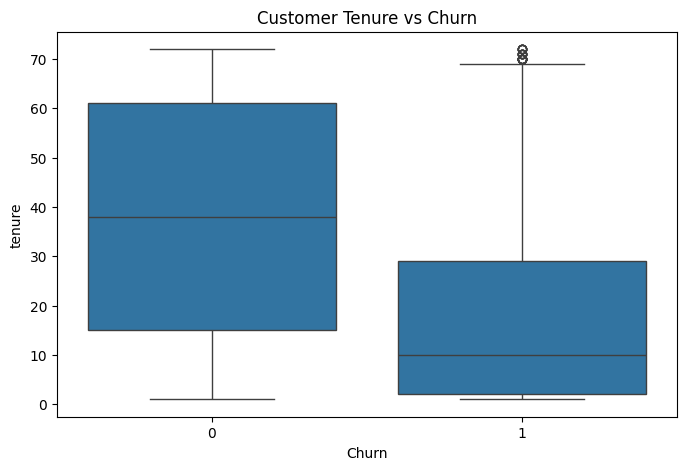

In [ ]:
#Tenure by Churn Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=telco_df)
plt.title('Customer Tenure vs Churn')
plt.show()

Key Findings: Churn is often higher for customers with shorter tenures

**Remark:**
House-Keeping
Univariate Analysis
1. Categorical Variable (Count Plot)
2. Numerical Variable (Histogram)

Time Series Analysis

Outlier Detection

Bivariate Analysis

Multivariate Regression Analysis

Correlation Heatmap


**Remark**: List out questions for justifications

 What question(s) are you trying to solve (or prove wrong)?

 What kind of data do you have and how do you treat different types?

 What’s missing from the data and how do you deal with it?

 Where are the outliers and why should you care about them?

 How can you add, change or remove features to get more out of your data?

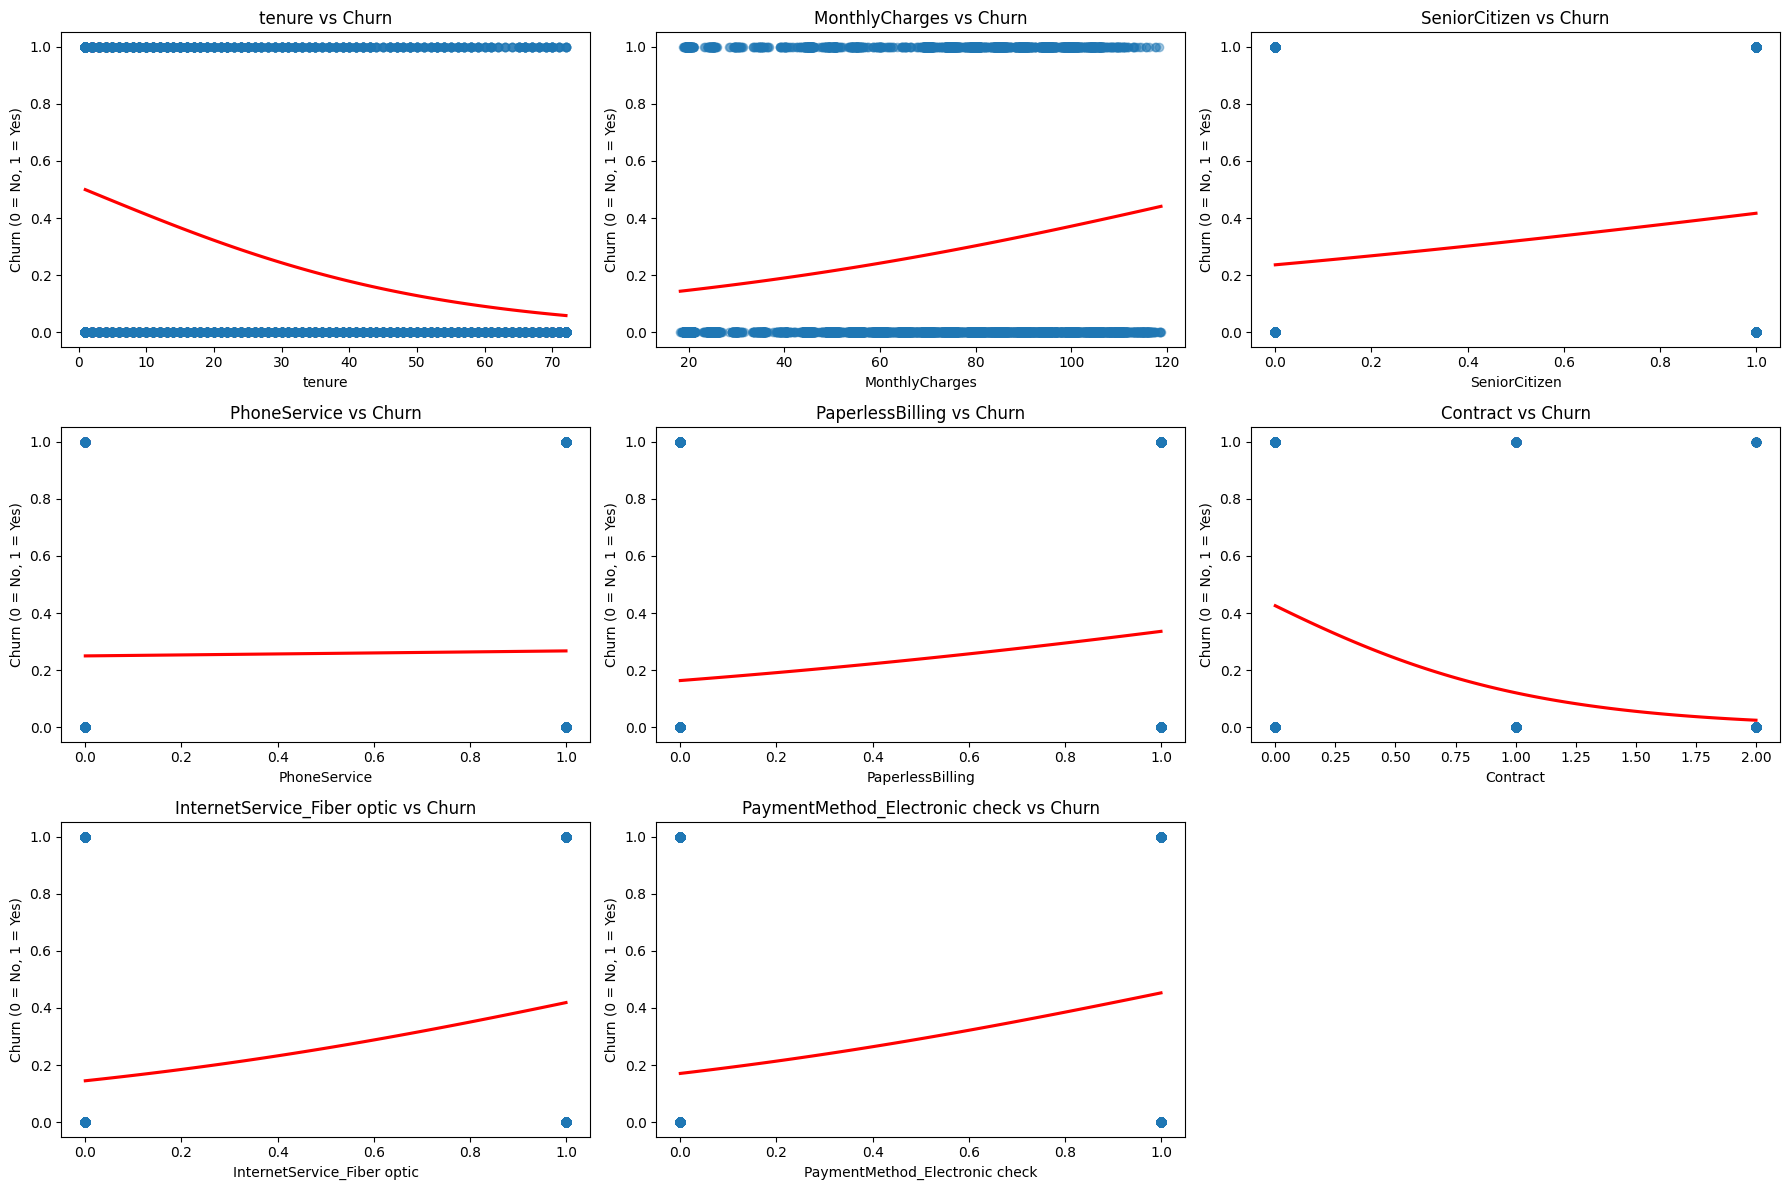

In [ ]:
#Bivariate Analysis

# Variables to plot against 'Churn'
vars_to_plot = [
    'tenure', 'MonthlyCharges', 'SeniorCitizen', 'PhoneService',
    'PaperlessBilling', 'Contract', 'InternetService_Fiber optic',
    'PaymentMethod_Electronic check'
]

# Grid size
cols = 3
rows = (len(vars_to_plot) + cols - 1) // cols

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))
axes = axes.flatten()

# Plot each variable vs Churn with regression line
for i, var in enumerate(vars_to_plot):
    sns.regplot(
        data=encoded_df,
        x=var,
        y='Churn',
        logistic=True,  # Use logistic regression for binary target
        ci=None,
        scatter_kws={'alpha': 0.4},
        line_kws={'color': 'red'},
        ax=axes[i]
    )
    axes[i].set_title(f'{var} vs Churn')
    axes[i].set_ylabel('Churn (0 = No, 1 = Yes)')
    axes[i].set_xlabel(var)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# **MODEL**

I believe we should use classification rather than clustering.

1. Our core requirement is to predict each customer’s probability of “churning,” and customer churn is inherently a binary classification problem (churn vs. retention). By using a classification model, we can directly address the prediction task: learning feature patterns from historical data (such as contract type, spending amount, etc.), establishing a mapping from those features to churn probability, and outputting a clear “yes/no” prediction. This directly supports customer segmentation and retention strategies.

2. The data structure is also perfectly suited for this approach, since our dataset includes an explicit label column (“Churn”), which falls under supervised learning. Classification models are the standard supervised-learning tools for handling binary classification problems. Therefore, we can employ classic classification algorithms such as K-Nearest Neighbors (KNN), Support Vector Classification (SVC), or Logistic Regression.



## Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
df = telco_df.apply(lambda x: object_to_int(x))
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

,Churn
Churn,1.000000
MonthlyCharges,0.192858
PaperlessBilling,0.191454
SeniorCitizen,0.150541
PaymentMethod,0.107852
MultipleLines,0.038043
PhoneService,0.011691
gender,-0.008545
customerID,-0.017858
StreamingTV,-0.036303


<Figure size 1400x700 with 0 Axes>

In [ ]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into 60% for training, 20% for validation, and 20% for testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=40, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=40, stratify=y_temp)

In [ ]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

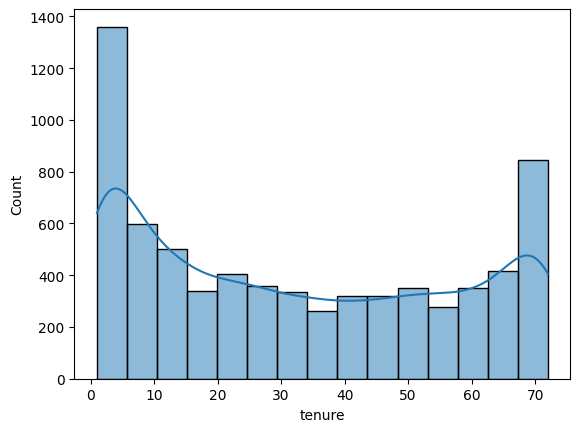

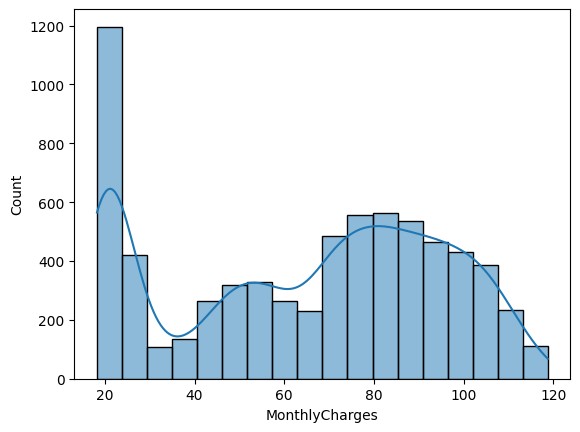

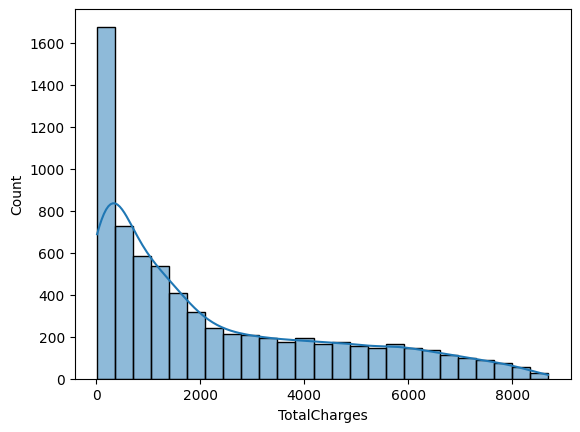

In [ ]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols:

    sns.histplot(df[feat], kde=True)
    plt.show()

### Standardizing numeric attributes

In [ ]:
from sklearn.preprocessing import StandardScaler

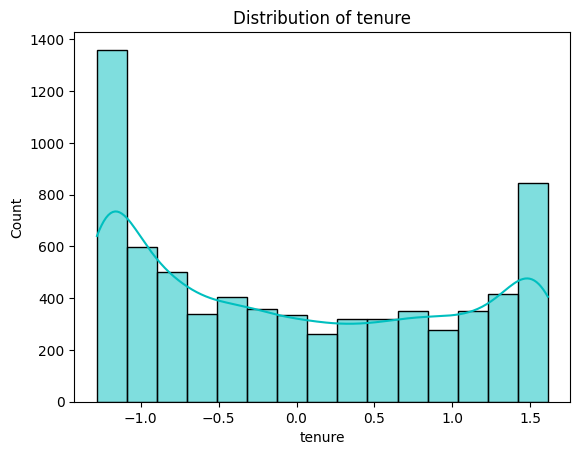

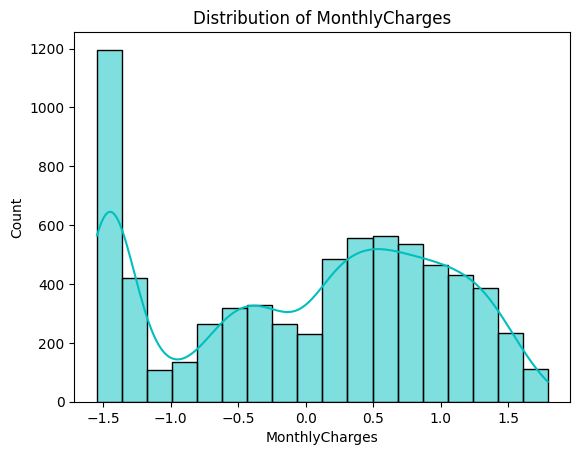

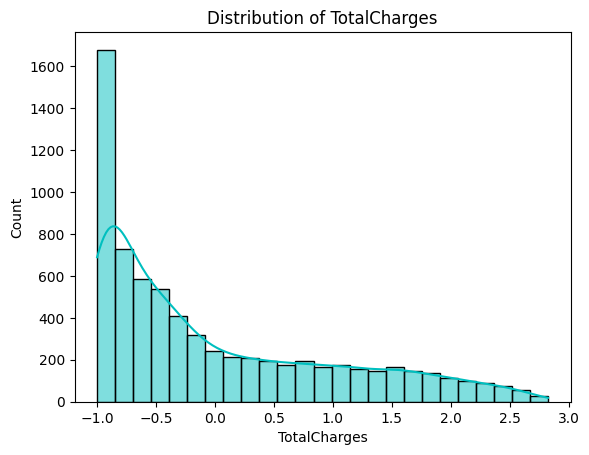

In [ ]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),columns=num_cols)

for feat in num_cols:
    sns.histplot(df_std[feat], color='c', kde=True)
    plt.title(f'Distribution of {feat}')
    plt.show()

In [ ]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [ ]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
df_std.head()

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457


### Balancing Data


[Class Distribution Before Balancing]
Counter({np.int64(0): 3098, np.int64(1): 1121})


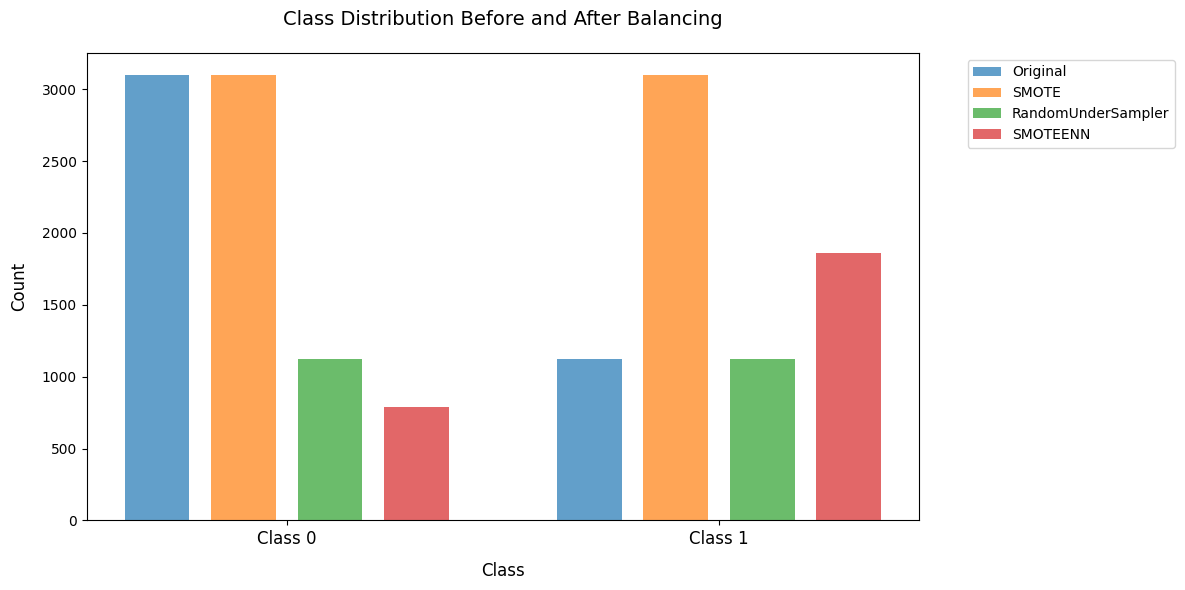


[Class Distribution After SMOTE]
Counter({np.int64(1): 3098, np.int64(0): 3098})

[Class Distribution After RandomUnderSampler]
Counter({np.int64(0): 1121, np.int64(1): 1121})

[Class Distribution After SMOTEENN]
Counter({np.int64(1): 1859, np.int64(0): 790})


In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Check class distribution before balancing
print("\n[Class Distribution Before Balancing]")
print(Counter(y_train))

# 2. Undersampling using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# 3. Oversampling using SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# 4. Combined sampling using SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_sen, y_train_sen = smote_enn.fit_resample(X_train, y_train)

# 5. Visualize class distribution before and after balancing
def plot_class_distribution(y_list, labels):
    plt.figure(figsize=(12, 6))
    bar_width = 0.15
    index = np.arange(2)
    for i, y in enumerate(y_list):
        counter = Counter(y)
        position = index + i * (bar_width + 0.05)
        plt.bar(position,
                [counter.get(k, 0) for k in sorted(counter.keys())],
                width=bar_width,
                alpha=0.7,
                label=labels[i])
    plt.xticks(index + (len(y_list)-1) * (bar_width + 0.05) / 2,
               ['Class 0', 'Class 1'],
               fontsize=12)
    plt.xlabel('Class', fontsize=12, labelpad=10)
    plt.ylabel('Count', fontsize=12, labelpad=10)
    plt.title('Class Distribution Before and After Balancing',
              fontsize=14,
              pad=20)
    plt.legend(bbox_to_anchor=(1.05, 1),
              loc='upper left',
              fontsize=10)
    plt.tight_layout()
    plt.show()
plot_class_distribution(
    [y_train, y_train_res, y_train_rus, y_train_sen],
    ['Original', 'SMOTE', 'RandomUnderSampler', 'SMOTEENN']
)

# 6. Print class distribution after each sampling method
print("\n[Class Distribution After SMOTE]")
print(Counter(y_train_res))
print("\n[Class Distribution After RandomUnderSampler]")
print(Counter(y_train_rus))
print("\n[Class Distribution After SMOTEENN]")
print(Counter(y_train_sen))

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train,y_train)

train_acc_knn = knn_model.score(X_train_res, y_train_res)
test_acc_knn = knn_model.score(X_test, y_test)
print("\n[KNN Results]")
print(f"Training Accuracy: {train_acc_knn:.4f}")
print(f"Testing Accuracy: {test_acc_knn:.4f}")
predicted_y = knn_model.predict(X_test)
print(classification_report(y_test, predicted_y))


[KNN Results]
Training Accuracy: 0.5608
Testing Accuracy: 0.7164
              precision    recall  f1-score   support

           0       0.74      0.95      0.83      1033
           1       0.35      0.07      0.12       374

    accuracy                           0.72      1407
   macro avg       0.54      0.51      0.48      1407
weighted avg       0.63      0.72      0.64      1407



In [ ]:
#AFTER TUNING
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the model
knn_model = KNeighborsClassifier()

# Set the hyperparameters to tune (with distributions for randomized search)
param_dist = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20],   # Search for different values of k (neighbors)
    'weights': ['uniform', 'distance'],        # 'uniform' means all points have equal weight, 'distance' means closer points are weighted more heavily
    'metric': ['euclidean', 'manhattan']      # Distance metric options
}

# Create RandomizedSearchCV (with 5 iterations)
random_search = RandomizedSearchCV(estimator=knn_model, param_distributions=param_dist, n_iter=5, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
print("Best Parameters:", random_search.best_params_)

# Best estimator (model with the best parameters)
best_knn_random = random_search.best_estimator_

# Evaluate the best model on the training and testing data
train_acc_knn_random = best_knn_random.score(X_train, y_train)
test_acc_knn_random = best_knn_random.score(X_test, y_test)

print("\n[KNN Results after RandomizedSearchCV]")
print(f"Training Accuracy: {train_acc_knn_random:.4f}")
print(f"Testing Accuracy: {test_acc_knn_random:.4f}")

# Predict and evaluate
predicted_y_random = best_knn_random.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_y_random))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'weights': 'distance', 'n_neighbors': 20, 'metric': 'manhattan'}

[KNN Results after RandomizedSearchCV]
Training Accuracy: 1.0000
Testing Accuracy: 0.7392
              precision    recall  f1-score   support

           0       0.75      0.98      0.85      1033
           1       0.56      0.09      0.15       374

    accuracy                           0.74      1407
   macro avg       0.65      0.53      0.50      1407
weighted avg       0.70      0.74      0.66      1407



## SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)

train_acc_svc = svc_model.score(X_train_res, y_train_res)
test_acc_svc = svc_model.score(X_test, y_test)
print("\n[SVC Results]")
print(f"Training Accuracy: {train_acc_svc:.4f}")
print(f"Testing Accuracy: {test_acc_svc:.4f}")
predict_y = svc_model.predict(X_test)
print(classification_report(y_test, predict_y))


[SVC Results]
Training Accuracy: 0.5000
Testing Accuracy: 0.7342
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1033
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1407
   macro avg       0.37      0.50      0.42      1407
weighted avg       0.54      0.73      0.62      1407



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the model
svc_model = SVC(random_state=42)

# Set the hyperparameters to tune (with distributions for randomized search)
param_dist = {
    'C': np.logspace(-3, 3, 7),  # Exponential distribution for C (between 0.001 to 1000)
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient options
    'class_weight': [None, 'balanced'],  # Handle imbalanced classes
}

# Create RandomizedSearchCV (with 10 iterations)
random_search_svc = RandomizedSearchCV(estimator=svc_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)

# Fit the model on the training data
random_search_svc.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
print("Best Parameters:", random_search_svc.best_params_)

# Best estimator (model with the best parameters)
best_svc_random = random_search_svc.best_estimator_

# Evaluate the best model on the training and testing data
train_acc_svc_random = best_svc_random.score(X_train, y_train)
test_acc_svc_random = best_svc_random.score(X_test, y_test)

print("\n[SVM Results after RandomizedSearchCV]")
print(f"Training Accuracy: {train_acc_svc_random:.4f}")
print(f"Testing Accuracy: {test_acc_svc_random:.4f}")

# Predict and evaluate
predicted_y_svc_random = best_svc_random.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_y_svc_random))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [ ]:
##create model
lr_model = LogisticRegression(
    max_iter=1000,
    solver='liblinear',
    random_state=42
)
lr_model.fit(X_train, y_train)

# evaluate
train_acc_lr = lr_model.score(X_train_res, y_train_res)
test_acc_lr = lr_model.score(X_test, y_test)
print("\n[Logistic Regression Results]")
print(f"Training Accuracy: {train_acc_lr:.4f}")
print(f"Testing Accuracy: {test_acc_lr:.4f}")
lr_pred = lr_model.predict(X_test)
print(classification_report(y_test, lr_pred))


[Logistic Regression Results]
Training Accuracy: 0.7190
Testing Accuracy: 0.8173
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1033
           1       0.69      0.56      0.62       374

    accuracy                           0.82      1407
   macro avg       0.77      0.74      0.75      1407
weighted avg       0.81      0.82      0.81      1407



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the Logistic Regression model
logreg_model = LogisticRegression(solver='liblinear', random_state=42)

# Set the hyperparameters to tune (with distributions for randomized search)
param_dist = {
    'C': np.logspace(-3, 3, 7),      # Exponential distribution for C (from 0.001 to 1000)
    'penalty': ['l1', 'l2'],         # L1 (Lasso) or L2 (Ridge) regularization
    'solver': ['liblinear', 'saga']  # Solvers that support L1 regularization
}

# Create RandomizedSearchCV (with 10 iterations)
random_search_logreg = RandomizedSearchCV(estimator=logreg_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)

# Fit the model on the training data
random_search_logreg.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
print("Best Parameters:", random_search_logreg.best_params_)

# Best estimator (model with the best parameters)
best_logreg_random = random_search_logreg.best_estimator_

# Evaluate the best model on the training and testing data
train_acc_logreg_random = best_logreg_random.score(X_train, y_train)
test_acc_logreg_random = best_logreg_random.score(X_test, y_test)

print("\n[Logistic Regression Results after RandomizedSearchCV]")
print(f"Training Accuracy: {train_acc_logreg_random:.4f}")
print(f"Testing Accuracy: {test_acc_logreg_random:.4f}")

# Predict and evaluate
predicted_y_logreg_random = best_logreg_random.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_y_logreg_random))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': np.float64(1.0)}

[Logistic Regression Results after RandomizedSearchCV]
Training Accuracy: 0.8018
Testing Accuracy: 0.8216
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1033
           1       0.71      0.56      0.62       374

    accuracy                           0.82      1407
   macro avg       0.78      0.74      0.75      1407
weighted avg       0.81      0.82      0.81      1407



<ipython-input-33-3439367732>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(10),


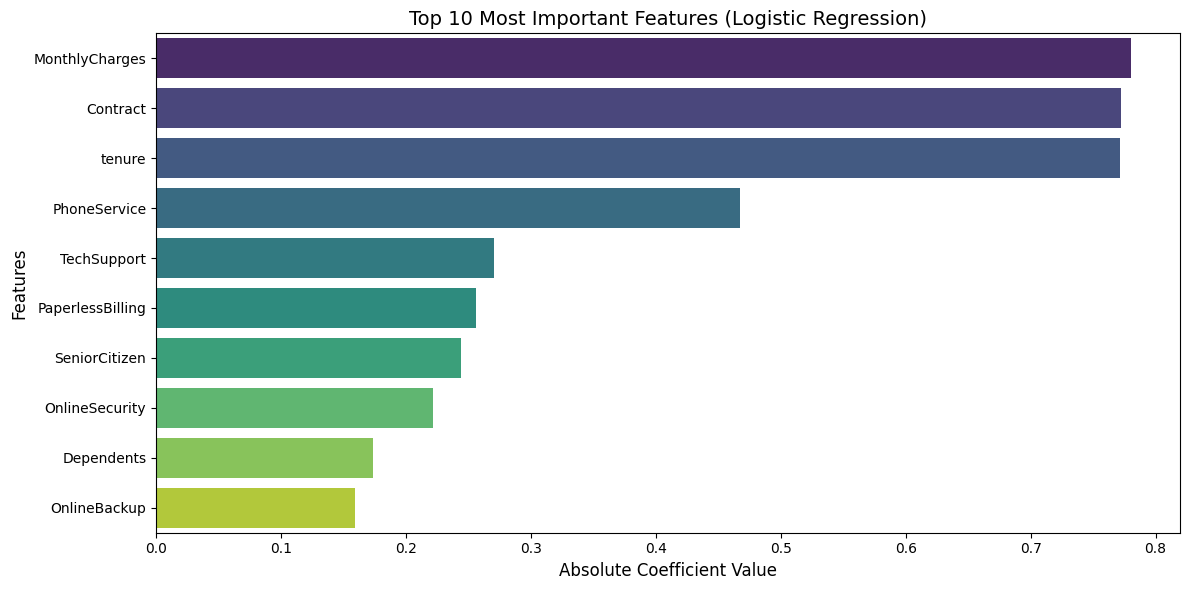

In [ ]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': abs(lr_model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10),
            x='importance',
            y='feature',
            palette='viridis')
plt.title('Top 10 Most Important Features (Logistic Regression)', fontsize=14)
plt.xlabel('Absolute Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

<ipython-input-34-860837037>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(10),


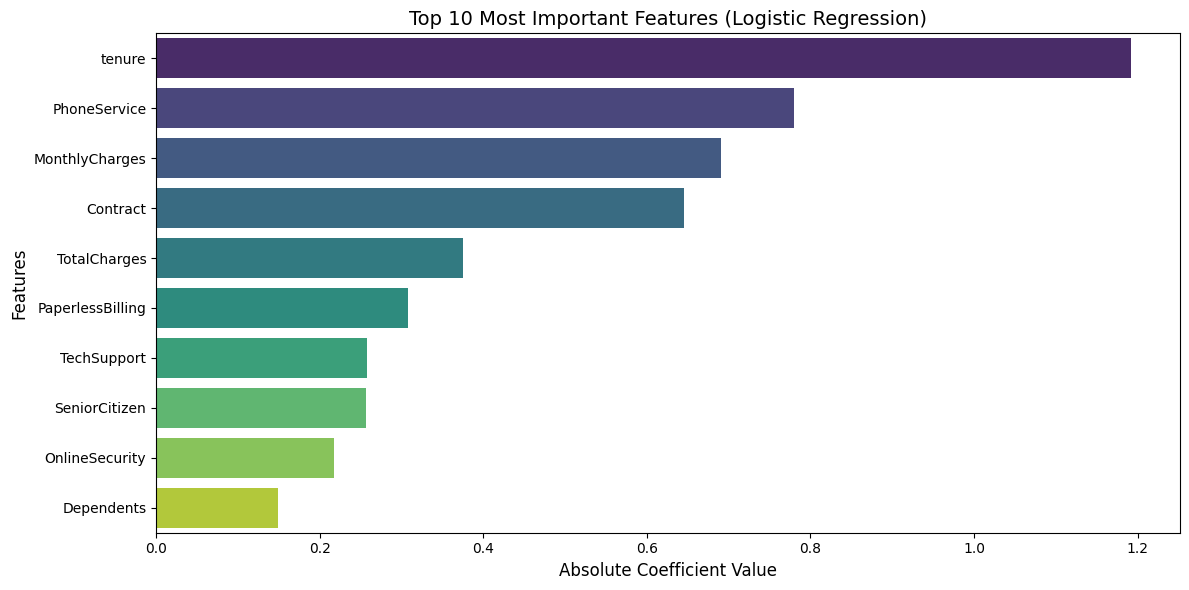

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from the model coefficients
feature_importance = pd.DataFrame({
    'feature': X_train.columns,           # Feature names from X_train
    'importance': abs(best_logreg_random.coef_[0])  # Absolute value of coefficients
})

# Sort the features by their importance
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10),
            x='importance',   # x-axis: the absolute coefficient values
            y='feature',      # y-axis: the feature names
            palette='viridis')  # Color palette for the bars

# Customize the plot
plt.title('Top 10 Most Important Features (Logistic Regression)', fontsize=14)
plt.xlabel('Absolute Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train on the training data
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:10:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
#predict
y_pred = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print results
print("XGBoost Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

XGBoost Model Evaluation Metrics:
Accuracy: 0.7797
Precision: 0.6067
Recall: 0.4866
F1 Score: 0.5401
ROC AUC: 0.8066


In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Set the hyperparameters to tune (with distributions for randomized search)
param_dist = {
    'learning_rate': np.linspace(0.01, 0.3, 30),    # Generate values between 0.01 and 0.3
    'max_depth': [3, 5, 7, 9, 10],                   # Maximum depth of trees
    'n_estimators': [50, 100, 200, 300],             # Number of boosting rounds
}

# Create RandomizedSearchCV (with 10 iterations)
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)

# Fit the model on the training data
random_search_xgb.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
print("Best Parameters:", random_search_xgb.best_params_)

# Best estimator (model with the best parameters)
best_xgb_random = random_search_xgb.best_estimator_

# Evaluate the best model on the training and testing data
train_acc_xgb_random = best_xgb_random.score(X_train, y_train)
test_acc_xgb_random = best_xgb_random.score(X_test, y_test)

print("\n[XGBoost Results after RandomizedSearchCV]")
print(f"Training Accuracy: {train_acc_xgb_random:.4f}")
print(f"Testing Accuracy: {test_acc_xgb_random:.4f}")

# Predict and evaluate
y_pred_xgb_random = best_xgb_random.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb_random))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:10:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': np.float64(0.09999999999999998)}

[XGBoost Results after RandomizedSearchCV]
Training Accuracy: 0.8229
Testing Accuracy: 0.8024
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



## LOGREG + ADABOOST

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
# Initialize logistic regression as base estimator
logreg_base = LogisticRegression(max_iter=1000, random_state=42)

# AdaBoost classifier with logistic regression as base estimator
ada_logreg = AdaBoostClassifier(
    estimator=logreg_base,
    n_estimators=50,
    learning_rate=1,
    random_state=42
)

# Train AdaBoost + Logistic Regression
ada_logreg.fit(X_train, y_train)

AdaBoostClassifier(estimator=LogisticRegression(max_iter=1000, random_state=42),
                   learning_rate=1, random_state=42)

In [ ]:
print(X_train.isnull().sum())  # if X_train is a DataFrame

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


In [ ]:
y_pred = ada_logreg.predict(X_test)
y_pred_prob = ada_logreg.predict_proba(X_test)[:, 1]

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Logistic Regression + AdaBoost Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Logistic Regression + AdaBoost Model Evaluation Metrics:
Accuracy: 0.7875
Precision: 0.6062
Recall: 0.5722
F1 Score: 0.5887
ROC AUC: 0.8220


# **INTERPRET**

## Comparison for Evaluation

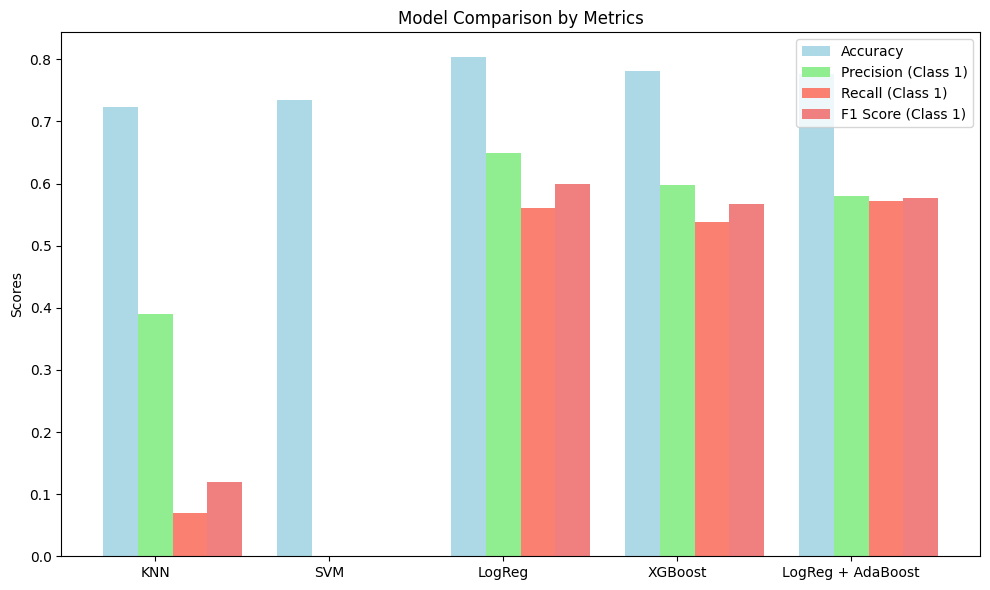

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Models and metrics
models = ['KNN', 'SVM', 'LogReg', 'XGBoost', 'LogReg + AdaBoost']
accuracy = [0.7237, 0.7341, 0.8033, 0.7810, 0.7763]
precision = [0.39, 0.00, 0.65, 0.5980, 0.5805]
recall = [0.07, 0.00, 0.56, 0.5383, 0.5722]
f1_score = [0.12, 0.00, 0.60, 0.5666, 0.5763]

# Plotting
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for each metric
ax.bar(x - width, accuracy, width, label='Accuracy', color='lightblue')
ax.bar(x, precision, width, label='Precision (Class 1)', color='lightgreen')
ax.bar(x + width, recall, width, label='Recall (Class 1)', color='salmon')
ax.bar(x + 2*width, f1_score, width, label='F1 Score (Class 1)', color='lightcoral')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Model Comparison by Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()

## Deployment Research

To deploy this model as a usable product:

- **Option 1: Streamlit App**
    - Build an interactive dashboard using `streamlit`.
    - Great for quick prototyping.

- **Option 2: Flask Web App**
    - Build an API endpoint to serve predictions.
    - Suitable for embedding into larger systems.

- **Option 3: Gradio Interface**
    - Easiest way to wrap model with GUI for demos.

> In production, consider saving the trained model using `joblib` or `pickle` and loading it in the web app.

5 groups of Data Products:
- Raw data (technical users)
- Derived Data (technical users)
- Algorithms (technical users)
- Decision Support
- Automated decision-making

In [ ]:
# got it from chatgpt
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 110.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.6 MB/s eta 0:00:00
